In [12]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
folder1=r"C:\Users\DELL\Documents\SHAUNAK\TY\CV\Cv_CP\Dataset_CV_Final\Positive Dataset\Vehicles_Resized_Final"
folder12=r"C:\Users\DELL\Documents\SHAUNAK\TY\CV\Cv_CP\Dataset_CV_Final\Positive Dataset\Pedestrian_Resized_Final"
folder2=r"C:\Users\DELL\Documents\SHAUNAK\TY\CV\Cv_CP\Dataset_CV_Final\Negative Dataset\EmptyRoad_Resized_Final"

In [16]:
i=0
for filename in os.listdir(folder1):
    
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (483, 32)
descriptor shape  1  :  (489, 32)
descriptor shape  2  :  (486, 32)
descriptor shape  3  :  (483, 32)
descriptor shape  4  :  (489, 32)
descriptor shape  5  :  (487, 32)
descriptor shape  6  :  (489, 32)
descriptor shape  7  :  (497, 32)
descriptor shape  8  :  (497, 32)
descriptor shape  9  :  (491, 32)
descriptor shape  10  :  (489, 32)
descriptor shape  11  :  (493, 32)
descriptor shape  12  :  (493, 32)
descriptor shape  13  :  (487, 32)
descriptor shape  14  :  (490, 32)
descriptor shape  15  :  (491, 32)
descriptor shape  16  :  (494, 32)
descriptor shape  17  :  (490, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (498, 32)
descriptor shape  20  :  (484, 32)
descriptor shape  21  :  (499, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (458, 32)
descriptor shape  24  :  (487, 32)
descriptor shape  25  :  (458, 32)
descriptor shape  26  :  (490, 32)
descriptor shape  27  :  (483, 32)
descriptor shape  28  :  (487,

descriptor shape  240  :  (500, 32)
descriptor shape  241  :  (493, 32)
descriptor shape  242  :  (484, 32)
descriptor shape  243  :  (491, 32)
descriptor shape  244  :  (399, 32)
descriptor shape  245  :  (483, 32)
descriptor shape  246  :  (467, 32)
descriptor shape  247  :  (483, 32)
descriptor shape  248  :  (491, 32)
descriptor shape  249  :  (481, 32)
descriptor shape  250  :  (488, 32)
descriptor shape  251  :  (488, 32)
descriptor shape  252  :  (482, 32)
descriptor shape  253  :  (477, 32)
descriptor shape  254  :  (488, 32)
descriptor shape  255  :  (488, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (487, 32)
descriptor shape  258  :  (497, 32)
descriptor shape  259  :  (436, 32)
descriptor shape  260  :  (491, 32)
descriptor shape  261  :  (495, 32)
descriptor shape  262  :  (491, 32)
descriptor shape  263  :  (431, 32)
descriptor shape  264  :  (490, 32)
descriptor shape  265  :  (490, 32)
descriptor shape  266  :  (473, 32)
descriptor shape  267  :  (4

descriptor shape  476  :  (485, 32)
descriptor shape  477  :  (486, 32)
descriptor shape  478  :  (486, 32)
descriptor shape  479  :  (488, 32)
descriptor shape  480  :  (480, 32)
descriptor shape  481  :  (494, 32)
descriptor shape  482  :  (441, 32)
descriptor shape  483  :  (500, 32)
descriptor shape  484  :  (500, 32)
descriptor shape  485  :  (485, 32)
descriptor shape  486  :  (490, 32)
descriptor shape  487  :  (473, 32)
descriptor shape  488  :  (473, 32)
descriptor shape  489  :  (479, 32)
descriptor shape  490  :  (493, 32)
descriptor shape  491  :  (479, 32)
descriptor shape  492  :  (480, 32)
descriptor shape  493  :  (486, 32)
descriptor shape  494  :  (500, 32)
descriptor shape  495  :  (500, 32)
descriptor shape  496  :  (467, 32)
descriptor shape  497  :  (459, 32)
descriptor shape  498  :  (451, 32)
descriptor shape  499  :  (500, 32)
descriptor shape  500  :  (500, 32)
descriptor shape  501  :  (488, 32)
descriptor shape  502  :  (493, 32)
descriptor shape  503  :  (4

descriptor shape  705  :  (481, 32)
descriptor shape  706  :  (481, 32)
descriptor shape  707  :  (487, 32)
descriptor shape  708  :  (500, 32)
descriptor shape  709  :  (469, 32)
descriptor shape  710  :  (469, 32)
descriptor shape  711  :  (487, 32)
descriptor shape  712  :  (463, 32)
descriptor shape  713  :  (491, 32)
descriptor shape  714  :  (473, 32)
descriptor shape  715  :  (451, 32)
descriptor shape  716  :  (490, 32)
descriptor shape  717  :  (488, 32)
descriptor shape  718  :  (498, 32)
descriptor shape  719  :  (489, 32)
descriptor shape  720  :  (483, 32)
descriptor shape  721  :  (483, 32)
descriptor shape  722  :  (486, 32)
descriptor shape  723  :  (500, 32)
descriptor shape  724  :  (499, 32)
descriptor shape  725  :  (489, 32)
descriptor shape  726  :  (500, 32)
descriptor shape  727  :  (488, 32)
descriptor shape  728  :  (500, 32)
descriptor shape  729  :  (489, 32)
descriptor shape  730  :  (488, 32)
descriptor shape  731  :  (488, 32)
descriptor shape  732  :  (4

descriptor shape  941  :  (500, 32)
descriptor shape  942  :  (490, 32)
descriptor shape  943  :  (481, 32)
descriptor shape  944  :  (488, 32)
descriptor shape  945  :  (485, 32)
descriptor shape  946  :  (500, 32)
descriptor shape  947  :  (481, 32)
descriptor shape  948  :  (481, 32)
descriptor shape  949  :  (496, 32)
descriptor shape  950  :  (500, 32)
descriptor shape  951  :  (494, 32)
descriptor shape  952  :  (483, 32)
descriptor shape  953  :  (486, 32)
descriptor shape  954  :  (500, 32)
descriptor shape  955  :  (494, 32)
descriptor shape  956  :  (491, 32)
descriptor shape  957  :  (494, 32)
descriptor shape  958  :  (491, 32)
descriptor shape  959  :  (488, 32)
descriptor shape  960  :  (494, 32)
descriptor shape  961  :  (496, 32)
descriptor shape  962  :  (495, 32)
descriptor shape  963  :  (492, 32)
descriptor shape  964  :  (500, 32)
descriptor shape  965  :  (492, 32)
descriptor shape  966  :  (495, 32)
descriptor shape  967  :  (486, 32)
descriptor shape  968  :  (4

descriptor shape  1175  :  (500, 32)
descriptor shape  1176  :  (484, 32)
descriptor shape  1177  :  (489, 32)
descriptor shape  1178  :  (488, 32)
descriptor shape  1179  :  (483, 32)
descriptor shape  1180  :  (483, 32)
descriptor shape  1181  :  (481, 32)
descriptor shape  1182  :  (490, 32)
descriptor shape  1183  :  (490, 32)
descriptor shape  1184  :  (491, 32)
descriptor shape  1185  :  (500, 32)
descriptor shape  1186  :  (496, 32)
descriptor shape  1187  :  (494, 32)
descriptor shape  1188  :  (498, 32)
descriptor shape  1189  :  (492, 32)
descriptor shape  1190  :  (500, 32)
descriptor shape  1191  :  (500, 32)
descriptor shape  1192  :  (495, 32)
descriptor shape  1193  :  (489, 32)
descriptor shape  1194  :  (486, 32)
descriptor shape  1195  :  (475, 32)
descriptor shape  1196  :  (500, 32)
descriptor shape  1197  :  (483, 32)
descriptor shape  1198  :  (481, 32)
descriptor shape  1199  :  (480, 32)
descriptor shape  1200  :  (486, 32)
descriptor shape  1201  :  (472, 32)
d

descriptor shape  1403  :  (495, 32)
descriptor shape  1404  :  (495, 32)
descriptor shape  1405  :  (488, 32)
descriptor shape  1406  :  (494, 32)
descriptor shape  1407  :  (494, 32)
descriptor shape  1408  :  (494, 32)
descriptor shape  1409  :  (453, 32)
descriptor shape  1410  :  (453, 32)
descriptor shape  1411  :  (484, 32)
descriptor shape  1412  :  (493, 32)
descriptor shape  1413  :  (491, 32)
descriptor shape  1414  :  (491, 32)
descriptor shape  1415  :  (500, 32)
descriptor shape  1416  :  (424, 32)
descriptor shape  1417  :  (491, 32)
descriptor shape  1418  :  (478, 32)
descriptor shape  1419  :  (485, 32)
descriptor shape  1420  :  (481, 32)
descriptor shape  1421  :  (487, 32)
descriptor shape  1422  :  (498, 32)
descriptor shape  1423  :  (497, 32)
descriptor shape  1424  :  (496, 32)
descriptor shape  1425  :  (497, 32)
descriptor shape  1426  :  (487, 32)
descriptor shape  1427  :  (488, 32)
descriptor shape  1428  :  (496, 32)
descriptor shape  1429  :  (446, 32)
d

descriptor shape  1632  :  (496, 32)
descriptor shape  1633  :  (488, 32)
descriptor shape  1634  :  (497, 32)
descriptor shape  1635  :  (485, 32)
descriptor shape  1636  :  (491, 32)
descriptor shape  1637  :  (471, 32)
descriptor shape  1638  :  (490, 32)
descriptor shape  1639  :  (487, 32)
descriptor shape  1640  :  (484, 32)
descriptor shape  1641  :  (472, 32)
descriptor shape  1642  :  (477, 32)
descriptor shape  1643  :  (478, 32)
descriptor shape  1644  :  (489, 32)
descriptor shape  1645  :  (488, 32)
descriptor shape  1646  :  (486, 32)
descriptor shape  1647  :  (492, 32)
descriptor shape  1648  :  (482, 32)
descriptor shape  1649  :  (482, 32)
descriptor shape  1650  :  (483, 32)
descriptor shape  1651  :  (485, 32)
descriptor shape  1652  :  (487, 32)
descriptor shape  1653  :  (488, 32)
descriptor shape  1654  :  (480, 32)
descriptor shape  1655  :  (487, 32)
descriptor shape  1656  :  (485, 32)
descriptor shape  1657  :  (491, 32)
descriptor shape  1658  :  (491, 32)
d

descriptor shape  1861  :  (469, 32)
descriptor shape  1862  :  (471, 32)
descriptor shape  1863  :  (486, 32)
descriptor shape  1864  :  (486, 32)
descriptor shape  1865  :  (448, 32)
descriptor shape  1866  :  (490, 32)
descriptor shape  1867  :  (500, 32)
descriptor shape  1868  :  (490, 32)
descriptor shape  1869  :  (487, 32)
descriptor shape  1870  :  (487, 32)
descriptor shape  1871  :  (480, 32)
descriptor shape  1872  :  (480, 32)
descriptor shape  1873  :  (478, 32)
descriptor shape  1874  :  (478, 32)
descriptor shape  1875  :  (486, 32)
descriptor shape  1876  :  (488, 32)
descriptor shape  1877  :  (496, 32)
descriptor shape  1878  :  (499, 32)
descriptor shape  1879  :  (499, 32)
descriptor shape  1880  :  (493, 32)
descriptor shape  1881  :  (472, 32)
descriptor shape  1882  :  (487, 32)
descriptor shape  1883  :  (493, 32)
descriptor shape  1884  :  (500, 32)
descriptor shape  1885  :  (489, 32)
descriptor shape  1886  :  (489, 32)
descriptor shape  1887  :  (500, 32)
d

descriptor shape  2083  :  (496, 32)
descriptor shape  2084  :  (477, 32)
descriptor shape  2085  :  (491, 32)
descriptor shape  2086  :  (488, 32)
descriptor shape  2087  :  (500, 32)
descriptor shape  2088  :  (433, 32)
descriptor shape  2089  :  (466, 32)
descriptor shape  2090  :  (466, 32)
descriptor shape  2091  :  (482, 32)
descriptor shape  2092  :  (446, 32)
descriptor shape  2093  :  (462, 32)
descriptor shape  2094  :  (448, 32)
descriptor shape  2095  :  (499, 32)
descriptor shape  2096  :  (483, 32)
descriptor shape  2097  :  (484, 32)
descriptor shape  2098  :  (492, 32)
descriptor shape  2099  :  (500, 32)
descriptor shape  2100  :  (494, 32)
descriptor shape  2101  :  (488, 32)
descriptor shape  2102  :  (482, 32)
descriptor shape  2103  :  (469, 32)
descriptor shape  2104  :  (466, 32)
descriptor shape  2105  :  (465, 32)
descriptor shape  2106  :  (479, 32)
descriptor shape  2107  :  (474, 32)
descriptor shape  2108  :  (487, 32)
descriptor shape  2109  :  (406, 32)
d

descriptor shape  2309  :  (500, 32)
descriptor shape  2310  :  (500, 32)
descriptor shape  2311  :  (500, 32)
descriptor shape  2312  :  (500, 32)
descriptor shape  2313  :  (488, 32)
descriptor shape  2314  :  (497, 32)
descriptor shape  2315  :  (488, 32)
descriptor shape  2316  :  (500, 32)
descriptor shape  2317  :  (500, 32)
descriptor shape  2318  :  (482, 32)
descriptor shape  2319  :  (482, 32)
descriptor shape  2320  :  (479, 32)
descriptor shape  2321  :  (479, 32)
descriptor shape  2322  :  (469, 32)
descriptor shape  2323  :  (469, 32)
descriptor shape  2324  :  (479, 32)
descriptor shape  2325  :  (492, 32)
descriptor shape  2326  :  (479, 32)
descriptor shape  2327  :  (494, 32)
descriptor shape  2328  :  (494, 32)
descriptor shape  2329  :  (500, 32)
descriptor shape  2330  :  (500, 32)
descriptor shape  2331  :  (496, 32)
descriptor shape  2332  :  (496, 32)
descriptor shape  2333  :  (496, 32)
descriptor shape  2334  :  (497, 32)
descriptor shape  2335  :  (500, 32)
d

descriptor shape  2535  :  (490, 32)
descriptor shape  2536  :  (496, 32)
descriptor shape  2537  :  (460, 32)
descriptor shape  2538  :  (500, 32)
descriptor shape  2539  :  (499, 32)
descriptor shape  2540  :  (490, 32)
descriptor shape  2541  :  (490, 32)
descriptor shape  2542  :  (484, 32)
descriptor shape  2543  :  (484, 32)
descriptor shape  2544  :  (477, 32)
descriptor shape  2545  :  (496, 32)
descriptor shape  2546  :  (464, 32)
descriptor shape  2547  :  (497, 32)
descriptor shape  2548  :  (500, 32)
descriptor shape  2549  :  (430, 32)
descriptor shape  2550  :  (329, 32)
descriptor shape  2551  :  (499, 32)
descriptor shape  2552  :  (499, 32)
descriptor shape  2553  :  (492, 32)
descriptor shape  2554  :  (473, 32)
descriptor shape  2555  :  (491, 32)
descriptor shape  2556  :  (486, 32)
descriptor shape  2557  :  (487, 32)
descriptor shape  2558  :  (500, 32)
descriptor shape  2559  :  (308, 32)
descriptor shape  2560  :  (468, 32)
descriptor shape  2561  :  (487, 32)
d

descriptor shape  2766  :  (497, 32)
descriptor shape  2767  :  (484, 32)
descriptor shape  2768  :  (464, 32)
descriptor shape  2769  :  (484, 32)
descriptor shape  2770  :  (500, 32)
descriptor shape  2771  :  (480, 32)
descriptor shape  2772  :  (480, 32)
descriptor shape  2773  :  (484, 32)
descriptor shape  2774  :  (488, 32)
descriptor shape  2775  :  (487, 32)
descriptor shape  2776  :  (483, 32)
descriptor shape  2777  :  (481, 32)
descriptor shape  2778  :  (492, 32)
descriptor shape  2779  :  (491, 32)
descriptor shape  2780  :  (469, 32)
descriptor shape  2781  :  (493, 32)
descriptor shape  2782  :  (468, 32)
descriptor shape  2783  :  (496, 32)
descriptor shape  2784  :  (473, 32)
descriptor shape  2785  :  (485, 32)
descriptor shape  2786  :  (467, 32)
descriptor shape  2787  :  (486, 32)
descriptor shape  2788  :  (484, 32)
descriptor shape  2789  :  (175, 32)
descriptor shape  2790  :  (486, 32)
descriptor shape  2791  :  (491, 32)
descriptor shape  2792  :  (490, 32)
d

descriptor shape  2989  :  (474, 32)
descriptor shape  2990  :  (482, 32)
descriptor shape  2991  :  (482, 32)
descriptor shape  2992  :  (493, 32)
descriptor shape  2993  :  (497, 32)
descriptor shape  2994  :  (445, 32)
descriptor shape  2995  :  (445, 32)
descriptor shape  2996  :  (447, 32)
descriptor shape  2997  :  (484, 32)
descriptor shape  2998  :  (476, 32)
descriptor shape  2999  :  (474, 32)
descriptor shape  3000  :  (413, 32)
descriptor shape  3001  :  (429, 32)
descriptor shape  3002  :  (491, 32)
descriptor shape  3003  :  (491, 32)
descriptor shape  3004  :  (500, 32)
descriptor shape  3005  :  (500, 32)
descriptor shape  3006  :  (491, 32)
descriptor shape  3007  :  (486, 32)
descriptor shape  3008  :  (489, 32)
descriptor shape  3009  :  (491, 32)
descriptor shape  3010  :  (489, 32)
descriptor shape  3011  :  (454, 32)
descriptor shape  3012  :  (484, 32)
descriptor shape  3013  :  (484, 32)
descriptor shape  3014  :  (483, 32)
descriptor shape  3015  :  (500, 32)
d

In [17]:
data1 = pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset1.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,74,155,38,210,227,212,57,119,173,205,...,178,196,95,123,126,195,6,132,173,95
1,10,156,51,254,87,205,189,119,157,2,...,48,255,245,254,90,10,26,12,165,186
2,232,183,252,119,249,91,85,63,51,255,...,227,15,239,247,117,187,98,228,206,123
3,82,187,190,182,235,184,60,231,175,127,...,139,241,190,115,222,139,132,84,173,95
4,86,0,246,239,46,40,76,57,141,130,...,203,200,146,250,203,152,54,251,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515438,253,0,255,227,21,110,80,1,237,177,...,81,128,195,219,80,82,234,1,65,34
1515439,53,133,105,75,244,203,71,249,87,96,...,125,31,39,204,161,100,117,138,208,160
1515440,57,73,107,108,44,15,71,120,196,136,...,96,61,225,169,32,24,113,187,114,160
1515441,192,188,153,253,105,236,177,7,190,27,...,146,227,205,182,90,59,144,64,131,171


In [18]:
i=0
for filename in os.listdir(folder12):
    #path
    path=os.path.join(folder12,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset12.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (495, 32)
descriptor shape  1  :  (500, 32)
descriptor shape  2  :  (495, 32)
descriptor shape  3  :  (500, 32)
descriptor shape  4  :  (500, 32)
descriptor shape  5  :  (500, 32)
descriptor shape  6  :  (492, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (494, 32)
descriptor shape  9  :  (496, 32)
descriptor shape  10  :  (488, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (485, 32)
descriptor shape  13  :  (498, 32)
descriptor shape  14  :  (498, 32)
descriptor shape  15  :  (480, 32)
descriptor shape  16  :  (492, 32)
descriptor shape  17  :  (489, 32)
descriptor shape  18  :  (487, 32)
descriptor shape  19  :  (495, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (483, 32)
descriptor shape  22  :  (490, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (491, 32)
descriptor shape  25  :  (492, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (488,

descriptor shape  235  :  (497, 32)
descriptor shape  236  :  (491, 32)
descriptor shape  237  :  (496, 32)
descriptor shape  238  :  (496, 32)
descriptor shape  239  :  (487, 32)
descriptor shape  240  :  (492, 32)
descriptor shape  241  :  (491, 32)
descriptor shape  242  :  (500, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (497, 32)
descriptor shape  245  :  (498, 32)
descriptor shape  246  :  (484, 32)
descriptor shape  247  :  (497, 32)
descriptor shape  248  :  (500, 32)
descriptor shape  249  :  (493, 32)
descriptor shape  250  :  (490, 32)
descriptor shape  251  :  (492, 32)
descriptor shape  252  :  (494, 32)
descriptor shape  253  :  (493, 32)
descriptor shape  254  :  (498, 32)
descriptor shape  255  :  (500, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (500, 32)
descriptor shape  259  :  (498, 32)
descriptor shape  260  :  (486, 32)
descriptor shape  261  :  (486, 32)
descriptor shape  262  :  (4

descriptor shape  463  :  (494, 32)
descriptor shape  464  :  (500, 32)
descriptor shape  465  :  (495, 32)
descriptor shape  466  :  (490, 32)
descriptor shape  467  :  (500, 32)
descriptor shape  468  :  (494, 32)
descriptor shape  469  :  (500, 32)
descriptor shape  470  :  (494, 32)
descriptor shape  471  :  (489, 32)
descriptor shape  472  :  (500, 32)
descriptor shape  473  :  (485, 32)
descriptor shape  474  :  (482, 32)
descriptor shape  475  :  (493, 32)
descriptor shape  476  :  (489, 32)
descriptor shape  477  :  (489, 32)
descriptor shape  478  :  (486, 32)
descriptor shape  479  :  (500, 32)
descriptor shape  480  :  (500, 32)
descriptor shape  481  :  (500, 32)
descriptor shape  482  :  (500, 32)
descriptor shape  483  :  (497, 32)
descriptor shape  484  :  (498, 32)
descriptor shape  485  :  (485, 32)
descriptor shape  486  :  (488, 32)
descriptor shape  487  :  (481, 32)
descriptor shape  488  :  (492, 32)
descriptor shape  489  :  (500, 32)
descriptor shape  490  :  (4

descriptor shape  696  :  (500, 32)
descriptor shape  697  :  (487, 32)
descriptor shape  698  :  (495, 32)
descriptor shape  699  :  (494, 32)
descriptor shape  700  :  (498, 32)
descriptor shape  701  :  (500, 32)
descriptor shape  702  :  (489, 32)
descriptor shape  703  :  (500, 32)
descriptor shape  704  :  (478, 32)
descriptor shape  705  :  (494, 32)
descriptor shape  706  :  (495, 32)
descriptor shape  707  :  (497, 32)
descriptor shape  708  :  (495, 32)
descriptor shape  709  :  (484, 32)
descriptor shape  710  :  (450, 32)
descriptor shape  711  :  (484, 32)
descriptor shape  712  :  (492, 32)
descriptor shape  713  :  (500, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (498, 32)
descriptor shape  716  :  (497, 32)
descriptor shape  717  :  (487, 32)
descriptor shape  718  :  (500, 32)
descriptor shape  719  :  (499, 32)
descriptor shape  720  :  (498, 32)
descriptor shape  721  :  (500, 32)
descriptor shape  722  :  (500, 32)
descriptor shape  723  :  (4

descriptor shape  927  :  (483, 32)
descriptor shape  928  :  (500, 32)
descriptor shape  929  :  (484, 32)
descriptor shape  930  :  (494, 32)
descriptor shape  931  :  (500, 32)
descriptor shape  932  :  (495, 32)
descriptor shape  933  :  (493, 32)
descriptor shape  934  :  (490, 32)
descriptor shape  935  :  (500, 32)
descriptor shape  936  :  (489, 32)
descriptor shape  937  :  (494, 32)
descriptor shape  938  :  (487, 32)
descriptor shape  939  :  (500, 32)
descriptor shape  940  :  (499, 32)
descriptor shape  941  :  (495, 32)
descriptor shape  942  :  (484, 32)
descriptor shape  943  :  (497, 32)
descriptor shape  944  :  (482, 32)
descriptor shape  945  :  (500, 32)
descriptor shape  946  :  (490, 32)
descriptor shape  947  :  (481, 32)
descriptor shape  948  :  (494, 32)
descriptor shape  949  :  (477, 32)
descriptor shape  950  :  (494, 32)
descriptor shape  951  :  (485, 32)
descriptor shape  952  :  (495, 32)
descriptor shape  953  :  (494, 32)
descriptor shape  954  :  (4

descriptor shape  1158  :  (500, 32)
descriptor shape  1159  :  (488, 32)
descriptor shape  1160  :  (494, 32)
descriptor shape  1161  :  (492, 32)
descriptor shape  1162  :  (483, 32)
descriptor shape  1163  :  (490, 32)
descriptor shape  1164  :  (487, 32)
descriptor shape  1165  :  (493, 32)
descriptor shape  1166  :  (484, 32)
descriptor shape  1167  :  (490, 32)
descriptor shape  1168  :  (500, 32)
descriptor shape  1169  :  (493, 32)
descriptor shape  1170  :  (494, 32)
descriptor shape  1171  :  (500, 32)
descriptor shape  1172  :  (488, 32)
descriptor shape  1173  :  (500, 32)
descriptor shape  1174  :  (491, 32)
descriptor shape  1175  :  (498, 32)
descriptor shape  1176  :  (491, 32)
descriptor shape  1177  :  (491, 32)
descriptor shape  1178  :  (496, 32)
descriptor shape  1179  :  (496, 32)
descriptor shape  1180  :  (490, 32)
descriptor shape  1181  :  (490, 32)
descriptor shape  1182  :  (490, 32)
descriptor shape  1183  :  (500, 32)
descriptor shape  1184  :  (492, 32)
d

descriptor shape  1380  :  (489, 32)
descriptor shape  1381  :  (492, 32)
descriptor shape  1382  :  (487, 32)
descriptor shape  1383  :  (491, 32)
descriptor shape  1384  :  (496, 32)
descriptor shape  1385  :  (486, 32)
descriptor shape  1386  :  (500, 32)
descriptor shape  1387  :  (495, 32)
descriptor shape  1388  :  (500, 32)
descriptor shape  1389  :  (495, 32)
descriptor shape  1390  :  (500, 32)
descriptor shape  1391  :  (500, 32)
descriptor shape  1392  :  (498, 32)
descriptor shape  1393  :  (499, 32)
descriptor shape  1394  :  (500, 32)
descriptor shape  1395  :  (478, 32)
descriptor shape  1396  :  (481, 32)
descriptor shape  1397  :  (490, 32)
descriptor shape  1398  :  (493, 32)
descriptor shape  1399  :  (499, 32)
descriptor shape  1400  :  (498, 32)
descriptor shape  1401  :  (485, 32)
descriptor shape  1402  :  (500, 32)
descriptor shape  1403  :  (500, 32)
descriptor shape  1404  :  (495, 32)
descriptor shape  1405  :  (500, 32)
descriptor shape  1406  :  (499, 32)
d

descriptor shape  1607  :  (479, 32)
descriptor shape  1608  :  (488, 32)
descriptor shape  1609  :  (494, 32)
descriptor shape  1610  :  (487, 32)
descriptor shape  1611  :  (494, 32)
descriptor shape  1612  :  (500, 32)
descriptor shape  1613  :  (500, 32)
descriptor shape  1614  :  (496, 32)
descriptor shape  1615  :  (500, 32)
descriptor shape  1616  :  (500, 32)
descriptor shape  1617  :  (394, 32)
descriptor shape  1618  :  (493, 32)
descriptor shape  1619  :  (491, 32)
descriptor shape  1620  :  (499, 32)
descriptor shape  1621  :  (480, 32)
descriptor shape  1622  :  (489, 32)
descriptor shape  1623  :  (499, 32)
descriptor shape  1624  :  (491, 32)
descriptor shape  1625  :  (500, 32)
descriptor shape  1626  :  (500, 32)
descriptor shape  1627  :  (475, 32)
descriptor shape  1628  :  (490, 32)
descriptor shape  1629  :  (487, 32)
descriptor shape  1630  :  (492, 32)
descriptor shape  1631  :  (486, 32)
descriptor shape  1632  :  (490, 32)
descriptor shape  1633  :  (475, 32)
d

descriptor shape  1830  :  (491, 32)
descriptor shape  1831  :  (500, 32)
descriptor shape  1832  :  (500, 32)
descriptor shape  1833  :  (499, 32)
descriptor shape  1834  :  (500, 32)
descriptor shape  1835  :  (487, 32)
descriptor shape  1836  :  (491, 32)
descriptor shape  1837  :  (500, 32)
descriptor shape  1838  :  (467, 32)
descriptor shape  1839  :  (491, 32)
descriptor shape  1840  :  (500, 32)
descriptor shape  1841  :  (494, 32)
descriptor shape  1842  :  (500, 32)
descriptor shape  1843  :  (489, 32)
descriptor shape  1844  :  (499, 32)
descriptor shape  1845  :  (500, 32)
descriptor shape  1846  :  (493, 32)
descriptor shape  1847  :  (481, 32)
descriptor shape  1848  :  (490, 32)
descriptor shape  1849  :  (500, 32)
descriptor shape  1850  :  (500, 32)
descriptor shape  1851  :  (488, 32)
descriptor shape  1852  :  (488, 32)
descriptor shape  1853  :  (490, 32)
descriptor shape  1854  :  (493, 32)
descriptor shape  1855  :  (500, 32)
descriptor shape  1856  :  (500, 32)
d

descriptor shape  2055  :  (500, 32)
descriptor shape  2056  :  (497, 32)
descriptor shape  2057  :  (494, 32)
descriptor shape  2058  :  (476, 32)
descriptor shape  2059  :  (486, 32)
descriptor shape  2060  :  (497, 32)
descriptor shape  2061  :  (500, 32)
descriptor shape  2062  :  (488, 32)
descriptor shape  2063  :  (491, 32)
descriptor shape  2064  :  (500, 32)
descriptor shape  2065  :  (486, 32)
descriptor shape  2066  :  (494, 32)
descriptor shape  2067  :  (500, 32)
descriptor shape  2068  :  (492, 32)
descriptor shape  2069  :  (500, 32)
descriptor shape  2070  :  (500, 32)
descriptor shape  2071  :  (488, 32)
descriptor shape  2072  :  (484, 32)
descriptor shape  2073  :  (500, 32)
descriptor shape  2074  :  (478, 32)
descriptor shape  2075  :  (490, 32)
descriptor shape  2076  :  (500, 32)
descriptor shape  2077  :  (491, 32)
descriptor shape  2078  :  (497, 32)
descriptor shape  2079  :  (488, 32)
descriptor shape  2080  :  (500, 32)
descriptor shape  2081  :  (499, 32)
d

descriptor shape  2277  :  (495, 32)
descriptor shape  2278  :  (497, 32)
descriptor shape  2279  :  (487, 32)
descriptor shape  2280  :  (500, 32)
descriptor shape  2281  :  (487, 32)
descriptor shape  2282  :  (499, 32)
descriptor shape  2283  :  (500, 32)
descriptor shape  2284  :  (500, 32)
descriptor shape  2285  :  (500, 32)
descriptor shape  2286  :  (495, 32)
descriptor shape  2287  :  (496, 32)
descriptor shape  2288  :  (7, 32)
descriptor shape  2289  :  (486, 32)
descriptor shape  2290  :  (486, 32)
descriptor shape  2291  :  (497, 32)
descriptor shape  2292  :  (499, 32)
descriptor shape  2293  :  (500, 32)
descriptor shape  2294  :  (496, 32)
descriptor shape  2295  :  (500, 32)
descriptor shape  2296  :  (499, 32)
descriptor shape  2297  :  (498, 32)
descriptor shape  2298  :  (475, 32)
descriptor shape  2299  :  (490, 32)
descriptor shape  2300  :  (500, 32)
descriptor shape  2301  :  (500, 32)
descriptor shape  2302  :  (490, 32)
descriptor shape  2303  :  (493, 32)
des

descriptor shape  2502  :  (499, 32)
descriptor shape  2503  :  (500, 32)
descriptor shape  2504  :  (500, 32)
descriptor shape  2505  :  (488, 32)
descriptor shape  2506  :  (490, 32)
descriptor shape  2507  :  (494, 32)
descriptor shape  2508  :  (492, 32)
descriptor shape  2509  :  (500, 32)
descriptor shape  2510  :  (480, 32)
descriptor shape  2511  :  (477, 32)
descriptor shape  2512  :  (500, 32)
descriptor shape  2513  :  (482, 32)
descriptor shape  2514  :  (492, 32)
descriptor shape  2515  :  (500, 32)
descriptor shape  2516  :  (496, 32)
descriptor shape  2517  :  (500, 32)
descriptor shape  2518  :  (487, 32)
descriptor shape  2519  :  (494, 32)
descriptor shape  2520  :  (495, 32)
descriptor shape  2521  :  (488, 32)
descriptor shape  2522  :  (499, 32)
descriptor shape  2523  :  (490, 32)
descriptor shape  2524  :  (500, 32)
descriptor shape  2525  :  (486, 32)
descriptor shape  2526  :  (484, 32)
descriptor shape  2527  :  (500, 32)
descriptor shape  2528  :  (477, 32)
d

descriptor shape  2727  :  (500, 32)
descriptor shape  2728  :  (497, 32)
descriptor shape  2729  :  (500, 32)
descriptor shape  2730  :  (489, 32)
descriptor shape  2731  :  (500, 32)
descriptor shape  2732  :  (495, 32)
descriptor shape  2733  :  (500, 32)
descriptor shape  2734  :  (486, 32)
descriptor shape  2735  :  (484, 32)
descriptor shape  2736  :  (497, 32)
descriptor shape  2737  :  (491, 32)
descriptor shape  2738  :  (500, 32)
descriptor shape  2739  :  (489, 32)
descriptor shape  2740  :  (500, 32)
descriptor shape  2741  :  (500, 32)
descriptor shape  2742  :  (493, 32)
descriptor shape  2743  :  (500, 32)
descriptor shape  2744  :  (496, 32)
descriptor shape  2745  :  (489, 32)
descriptor shape  2746  :  (488, 32)
descriptor shape  2747  :  (493, 32)
descriptor shape  2748  :  (493, 32)
descriptor shape  2749  :  (497, 32)
descriptor shape  2750  :  (493, 32)
descriptor shape  2751  :  (486, 32)
descriptor shape  2752  :  (493, 32)
descriptor shape  2753  :  (489, 32)
d

descriptor shape  2949  :  (500, 32)
descriptor shape  2950  :  (493, 32)
descriptor shape  2951  :  (500, 32)
descriptor shape  2952  :  (491, 32)
descriptor shape  2953  :  (500, 32)
descriptor shape  2954  :  (500, 32)
descriptor shape  2955  :  (497, 32)
descriptor shape  2956  :  (500, 32)
descriptor shape  2957  :  (498, 32)
descriptor shape  2958  :  (498, 32)
descriptor shape  2959  :  (491, 32)
descriptor shape  2960  :  (500, 32)
descriptor shape  2961  :  (456, 32)
descriptor shape  2962  :  (490, 32)
descriptor shape  2963  :  (499, 32)
descriptor shape  2964  :  (499, 32)
descriptor shape  2965  :  (485, 32)
descriptor shape  2966  :  (447, 32)
descriptor shape  2967  :  (488, 32)
descriptor shape  2968  :  (499, 32)
descriptor shape  2969  :  (498, 32)
descriptor shape  2970  :  (499, 32)
descriptor shape  2971  :  (469, 32)
descriptor shape  2972  :  (500, 32)
descriptor shape  2973  :  (500, 32)
descriptor shape  2974  :  (497, 32)
descriptor shape  2975  :  (500, 32)
d

descriptor shape  3172  :  (492, 32)
descriptor shape  3173  :  (485, 32)
descriptor shape  3174  :  (489, 32)
descriptor shape  3175  :  (495, 32)
descriptor shape  3176  :  (491, 32)
descriptor shape  3177  :  (487, 32)
descriptor shape  3178  :  (500, 32)
descriptor shape  3179  :  (468, 32)
descriptor shape  3180  :  (500, 32)
descriptor shape  3181  :  (496, 32)
descriptor shape  3182  :  (491, 32)
descriptor shape  3183  :  (500, 32)
descriptor shape  3184  :  (488, 32)
descriptor shape  3185  :  (477, 32)
descriptor shape  3186  :  (483, 32)
descriptor shape  3187  :  (500, 32)
descriptor shape  3188  :  (490, 32)
descriptor shape  3189  :  (471, 32)
descriptor shape  3190  :  (493, 32)
descriptor shape  3191  :  (500, 32)
descriptor shape  3192  :  (488, 32)
descriptor shape  3193  :  (500, 32)
descriptor shape  3194  :  (500, 32)
descriptor shape  3195  :  (486, 32)
descriptor shape  3196  :  (500, 32)
descriptor shape  3197  :  (492, 32)
descriptor shape  3198  :  (492, 32)
d

In [19]:
data12 = pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset12.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data12=data12.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data12

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,131,3,15,137,206,35,169,79,12,105,...,69,82,20,32,186,196,61,8,185,212
1,233,186,189,117,44,125,209,182,202,127,...,231,51,71,223,112,122,64,201,86,109
2,62,219,246,254,255,215,223,253,91,252,...,58,253,251,223,255,255,215,188,255,255
3,0,150,183,249,137,233,53,239,159,23,...,211,243,141,242,86,95,144,88,165,42
4,200,60,150,242,9,237,16,194,190,55,...,154,115,219,211,83,127,210,65,7,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629063,22,168,255,246,40,7,26,232,47,177,...,155,225,203,250,95,22,164,227,35,42
1629064,127,216,174,183,43,212,186,208,167,244,...,187,177,223,233,207,155,3,135,47,219
1629065,192,179,81,97,50,11,83,56,43,236,...,237,23,132,240,33,246,110,139,7,53
1629066,106,7,135,78,121,22,78,57,129,136,...,232,239,51,125,128,155,82,166,126,61


In [20]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset2.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (454, 32)
descriptor shape  1  :  (384, 32)
descriptor shape  2  :  (439, 32)
descriptor shape  3  :  (491, 32)
descriptor shape  4  :  (488, 32)
descriptor shape  5  :  (123, 32)
descriptor shape  6  :  (497, 32)
descriptor shape  7  :  (470, 32)
descriptor shape  8  :  (266, 32)
descriptor shape  9  :  (187, 32)
descriptor shape  10  :  (421, 32)
descriptor shape  11  :  (483, 32)
descriptor shape  12  :  (470, 32)
descriptor shape  13  :  (325, 32)
descriptor shape  14  :  (111, 32)
descriptor shape  15  :  (113, 32)
descriptor shape  16  :  (69, 32)
descriptor shape  17  :  (491, 32)
descriptor shape  18  :  (472, 32)
descriptor shape  19  :  (252, 32)
descriptor shape  20  :  (63, 32)
descriptor shape  21  :  (263, 32)
descriptor shape  22  :  (285, 32)
descriptor shape  23  :  (459, 32)
descriptor shape  24  :  (401, 32)
descriptor shape  25  :  (168, 32)
descriptor shape  26  :  (244, 32)
descriptor shape  27  :  (491, 32)
descriptor shape  28  :  (476, 3

descriptor shape  236  :  (47, 32)
descriptor shape  237  :  (433, 32)
descriptor shape  238  :  (404, 32)
descriptor shape  239  :  (385, 32)
descriptor shape  240  :  (406, 32)
descriptor shape  241  :  (494, 32)
descriptor shape  242  :  (488, 32)
descriptor shape  243  :  (485, 32)
descriptor shape  244  :  (490, 32)
descriptor shape  245  :  (482, 32)
descriptor shape  246  :  (135, 32)
descriptor shape  247  :  (483, 32)
descriptor shape  248  :  (112, 32)
descriptor shape  249  :  (164, 32)
descriptor shape  250  :  (480, 32)
descriptor shape  251  :  (495, 32)
descriptor shape  252  :  (477, 32)
descriptor shape  253  :  (475, 32)
descriptor shape  254  :  (127, 32)
descriptor shape  255  :  (453, 32)
descriptor shape  256  :  (159, 32)
descriptor shape  257  :  (440, 32)
descriptor shape  258  :  (472, 32)
descriptor shape  259  :  (226, 32)
descriptor shape  260  :  (470, 32)
descriptor shape  261  :  (165, 32)
descriptor shape  262  :  (496, 32)
descriptor shape  263  :  (48

descriptor shape  467  :  (220, 32)
descriptor shape  468  :  (291, 32)
descriptor shape  469  :  (485, 32)
descriptor shape  470  :  (482, 32)
descriptor shape  471  :  (447, 32)
descriptor shape  472  :  (32, 32)
descriptor shape  473  :  (117, 32)
descriptor shape  474  :  (404, 32)
descriptor shape  475  :  (359, 32)
descriptor shape  476  :  (203, 32)
descriptor shape  477  :  (482, 32)
descriptor shape  478  :  (494, 32)
descriptor shape  479  :  (473, 32)
descriptor shape  480  :  (405, 32)
descriptor shape  481  :  (229, 32)
descriptor shape  482  :  (393, 32)
descriptor shape  483  :  (446, 32)
descriptor shape  484  :  (155, 32)
descriptor shape  485  :  (132, 32)
descriptor shape  486  :  (36, 32)
descriptor shape  487  :  (232, 32)
descriptor shape  488  :  (105, 32)
descriptor shape  489  :  (126, 32)
descriptor shape  490  :  (444, 32)
descriptor shape  491  :  (462, 32)
descriptor shape  492  :  (397, 32)
descriptor shape  493  :  (488, 32)
descriptor shape  494  :  (140

descriptor shape  696  :  (482, 32)
descriptor shape  697  :  (179, 32)
descriptor shape  698  :  (198, 32)
descriptor shape  699  :  (407, 32)
descriptor shape  700  :  (500, 32)
descriptor shape  701  :  (112, 32)
descriptor shape  702  :  (267, 32)
descriptor shape  703  :  (488, 32)
descriptor shape  704  :  (113, 32)
descriptor shape  705  :  (468, 32)
descriptor shape  706  :  (178, 32)
descriptor shape  707  :  (484, 32)
descriptor shape  708  :  (194, 32)
descriptor shape  709  :  (273, 32)
descriptor shape  710  :  (217, 32)
descriptor shape  711  :  (452, 32)
descriptor shape  712  :  (499, 32)
descriptor shape  713  :  (455, 32)
descriptor shape  714  :  (453, 32)
descriptor shape  715  :  (491, 32)
descriptor shape  716  :  (217, 32)
descriptor shape  717  :  (28, 32)
descriptor shape  718  :  (467, 32)
descriptor shape  719  :  (403, 32)
descriptor shape  720  :  (221, 32)
descriptor shape  721  :  (488, 32)
descriptor shape  722  :  (427, 32)
descriptor shape  723  :  (48

descriptor shape  929  :  (463, 32)
descriptor shape  930  :  (437, 32)
descriptor shape  931  :  (498, 32)
descriptor shape  932  :  (438, 32)
descriptor shape  933  :  (468, 32)
descriptor shape  934  :  (462, 32)
descriptor shape  935  :  (172, 32)
descriptor shape  936  :  (472, 32)
descriptor shape  937  :  (69, 32)
descriptor shape  938  :  (465, 32)
descriptor shape  939  :  (468, 32)
descriptor shape  940  :  (464, 32)
descriptor shape  941  :  (488, 32)
descriptor shape  942  :  (496, 32)
descriptor shape  943  :  (500, 32)
descriptor shape  944  :  (500, 32)
descriptor shape  945  :  (500, 32)
descriptor shape  946  :  (498, 32)
descriptor shape  947  :  (41, 32)
descriptor shape  948  :  (144, 32)
descriptor shape  949  :  (467, 32)
descriptor shape  950  :  (397, 32)
descriptor shape  951  :  (500, 32)
descriptor shape  952  :  (498, 32)
descriptor shape  953  :  (389, 32)
descriptor shape  954  :  (175, 32)
descriptor shape  955  :  (498, 32)
descriptor shape  956  :  (463

descriptor shape  1155  :  (491, 32)
descriptor shape  1156  :  (87, 32)
descriptor shape  1157  :  (180, 32)
descriptor shape  1158  :  (255, 32)
descriptor shape  1159  :  (483, 32)
descriptor shape  1160  :  (496, 32)
descriptor shape  1161  :  (485, 32)
descriptor shape  1162  :  (453, 32)
descriptor shape  1163  :  (202, 32)
descriptor shape  1164  :  (151, 32)
descriptor shape  1165  :  (176, 32)
descriptor shape  1166  :  (82, 32)
descriptor shape  1167  :  (74, 32)
descriptor shape  1168  :  (471, 32)
descriptor shape  1169  :  (53, 32)
descriptor shape  1170  :  (473, 32)
descriptor shape  1171  :  (107, 32)
descriptor shape  1172  :  (425, 32)
descriptor shape  1173  :  (488, 32)
descriptor shape  1174  :  (392, 32)
descriptor shape  1175  :  (121, 32)
descriptor shape  1176  :  (467, 32)
descriptor shape  1177  :  (117, 32)
descriptor shape  1178  :  (237, 32)
descriptor shape  1179  :  (454, 32)
descriptor shape  1180  :  (457, 32)
descriptor shape  1181  :  (489, 32)
descr

descriptor shape  1378  :  (456, 32)
descriptor shape  1379  :  (458, 32)
descriptor shape  1380  :  (10, 32)
descriptor shape  1381  :  (122, 32)
descriptor shape  1382  :  (485, 32)
descriptor shape  1383  :  (362, 32)
descriptor shape  1384  :  (346, 32)
descriptor shape  1385  :  (169, 32)
descriptor shape  1386  :  (269, 32)
descriptor shape  1387  :  (152, 32)
descriptor shape  1388  :  (232, 32)
descriptor shape  1389  :  (180, 32)
descriptor shape  1390  :  (222, 32)
descriptor shape  1391  :  (477, 32)
descriptor shape  1392  :  (42, 32)
descriptor shape  1393  :  (302, 32)
descriptor shape  1394  :  (397, 32)
descriptor shape  1395  :  (105, 32)
descriptor shape  1396  :  (371, 32)
descriptor shape  1397  :  (497, 32)
descriptor shape  1398  :  (477, 32)
descriptor shape  1399  :  (454, 32)
descriptor shape  1400  :  (389, 32)
descriptor shape  1401  :  (323, 32)
descriptor shape  1402  :  (158, 32)
descriptor shape  1403  :  (416, 32)
descriptor shape  1404  :  (296, 32)
des

descriptor shape  1602  :  (108, 32)
descriptor shape  1603  :  (160, 32)
descriptor shape  1604  :  (128, 32)
descriptor shape  1605  :  (212, 32)
descriptor shape  1606  :  (488, 32)
descriptor shape  1607  :  (488, 32)
descriptor shape  1608  :  (194, 32)
descriptor shape  1609  :  (500, 32)
descriptor shape  1610  :  (470, 32)
descriptor shape  1611  :  (487, 32)
descriptor shape  1612  :  (327, 32)
descriptor shape  1613  :  (187, 32)
descriptor shape  1614  :  (458, 32)
descriptor shape  1615  :  (96, 32)
descriptor shape  1616  :  (33, 32)
descriptor shape  1617  :  (132, 32)
descriptor shape  1618  :  (112, 32)
descriptor shape  1619  :  (307, 32)
descriptor shape  1620  :  (488, 32)
descriptor shape  1621  :  (138, 32)
descriptor shape  1622  :  (196, 32)
descriptor shape  1623  :  (428, 32)
descriptor shape  1624  :  (186, 32)
descriptor shape  1625  :  (148, 32)
descriptor shape  1626  :  (161, 32)
descriptor shape  1627  :  (488, 32)
descriptor shape  1628  :  (34, 32)
desc

descriptor shape  1827  :  (492, 32)
descriptor shape  1828  :  (454, 32)
descriptor shape  1829  :  (481, 32)
descriptor shape  1830  :  (500, 32)
descriptor shape  1831  :  (455, 32)
descriptor shape  1832  :  (260, 32)
descriptor shape  1833  :  (477, 32)
descriptor shape  1834  :  (457, 32)
descriptor shape  1835  :  (455, 32)
descriptor shape  1836  :  (488, 32)
descriptor shape  1837  :  (130, 32)
descriptor shape  1838  :  (339, 32)
descriptor shape  1839  :  (475, 32)
descriptor shape  1840  :  (485, 32)
descriptor shape  1841  :  (463, 32)
descriptor shape  1842  :  (460, 32)
descriptor shape  1843  :  (446, 32)
descriptor shape  1844  :  (479, 32)
descriptor shape  1845  :  (464, 32)
descriptor shape  1846  :  (458, 32)
descriptor shape  1847  :  (240, 32)
descriptor shape  1848  :  (494, 32)
descriptor shape  1849  :  (455, 32)
descriptor shape  1850  :  (456, 32)
descriptor shape  1851  :  (439, 32)
descriptor shape  1852  :  (455, 32)
descriptor shape  1853  :  (462, 32)
d

descriptor shape  2054  :  (423, 32)
descriptor shape  2055  :  (429, 32)
descriptor shape  2056  :  (485, 32)
descriptor shape  2057  :  (435, 32)
descriptor shape  2058  :  (441, 32)
descriptor shape  2059  :  (445, 32)
descriptor shape  2060  :  (452, 32)
descriptor shape  2061  :  (445, 32)
descriptor shape  2062  :  (452, 32)
descriptor shape  2063  :  (459, 32)
descriptor shape  2064  :  (452, 32)
descriptor shape  2065  :  (463, 32)
descriptor shape  2066  :  (472, 32)
descriptor shape  2067  :  (231, 32)
descriptor shape  2068  :  (459, 32)
descriptor shape  2069  :  (467, 32)
descriptor shape  2070  :  (471, 32)
descriptor shape  2071  :  (470, 32)
descriptor shape  2072  :  (472, 32)
descriptor shape  2073  :  (468, 32)
descriptor shape  2074  :  (455, 32)
descriptor shape  2075  :  (462, 32)
descriptor shape  2076  :  (456, 32)
descriptor shape  2077  :  (461, 32)
descriptor shape  2078  :  (287, 32)
descriptor shape  2079  :  (7, 32)
descriptor shape  2080  :  (462, 32)
des

descriptor shape  2280  :  (453, 32)
descriptor shape  2281  :  (449, 32)
descriptor shape  2282  :  (459, 32)
descriptor shape  2283  :  (451, 32)
descriptor shape  2284  :  (445, 32)
descriptor shape  2285  :  (448, 32)
descriptor shape  2286  :  (445, 32)
descriptor shape  2287  :  (441, 32)
descriptor shape  2288  :  (449, 32)
descriptor shape  2289  :  (233, 32)
descriptor shape  2290  :  (53, 32)
descriptor shape  2291  :  (447, 32)
descriptor shape  2292  :  (446, 32)
descriptor shape  2293  :  (457, 32)
descriptor shape  2294  :  (446, 32)
descriptor shape  2295  :  (447, 32)
descriptor shape  2296  :  (439, 32)
descriptor shape  2297  :  (443, 32)
descriptor shape  2298  :  (438, 32)
descriptor shape  2299  :  (433, 32)
descriptor shape  2300  :  (430, 32)
descriptor shape  2301  :  (453, 32)
descriptor shape  2302  :  (409, 32)
descriptor shape  2303  :  (437, 32)
descriptor shape  2304  :  (437, 32)
descriptor shape  2305  :  (445, 32)
descriptor shape  2306  :  (438, 32)
de

descriptor shape  2504  :  (460, 32)
descriptor shape  2505  :  (457, 32)
descriptor shape  2506  :  (465, 32)
descriptor shape  2507  :  (459, 32)
descriptor shape  2508  :  (117, 32)
descriptor shape  2509  :  (456, 32)
descriptor shape  2510  :  (454, 32)
descriptor shape  2511  :  (450, 32)
descriptor shape  2512  :  (423, 32)
descriptor shape  2513  :  (453, 32)
descriptor shape  2514  :  (470, 32)
descriptor shape  2515  :  (458, 32)
descriptor shape  2516  :  (453, 32)
descriptor shape  2517  :  (457, 32)
descriptor shape  2518  :  (464, 32)
descriptor shape  2519  :  (459, 32)
descriptor shape  2520  :  (217, 32)
descriptor shape  2521  :  (467, 32)
descriptor shape  2522  :  (444, 32)
descriptor shape  2523  :  (179, 32)
descriptor shape  2524  :  (456, 32)
descriptor shape  2525  :  (464, 32)
descriptor shape  2526  :  (461, 32)
descriptor shape  2527  :  (464, 32)
descriptor shape  2528  :  (464, 32)
descriptor shape  2529  :  (467, 32)
descriptor shape  2530  :  (465, 32)
d

descriptor shape  2729  :  (439, 32)
descriptor shape  2730  :  (183, 32)
descriptor shape  2731  :  (441, 32)
descriptor shape  2732  :  (431, 32)
descriptor shape  2733  :  (446, 32)
descriptor shape  2734  :  (448, 32)
descriptor shape  2735  :  (448, 32)
descriptor shape  2736  :  (428, 32)
descriptor shape  2737  :  (445, 32)
descriptor shape  2738  :  (418, 32)
descriptor shape  2739  :  (424, 32)
descriptor shape  2740  :  (444, 32)
descriptor shape  2741  :  (439, 32)
descriptor shape  2742  :  (450, 32)
descriptor shape  2743  :  (425, 32)
descriptor shape  2744  :  (448, 32)
descriptor shape  2745  :  (500, 32)
descriptor shape  2746  :  (408, 32)
descriptor shape  2747  :  (418, 32)
descriptor shape  2748  :  (444, 32)
descriptor shape  2749  :  (442, 32)
descriptor shape  2750  :  (411, 32)
descriptor shape  2751  :  (500, 32)
descriptor shape  2752  :  (137, 32)
descriptor shape  2753  :  (431, 32)
descriptor shape  2754  :  (479, 32)
descriptor shape  2755  :  (448, 32)
d

descriptor shape  2952  :  (468, 32)
descriptor shape  2953  :  (474, 32)
descriptor shape  2954  :  (469, 32)
descriptor shape  2955  :  (468, 32)
descriptor shape  2956  :  (454, 32)
descriptor shape  2957  :  (463, 32)
descriptor shape  2958  :  (465, 32)
descriptor shape  2959  :  (473, 32)
descriptor shape  2960  :  (474, 32)
descriptor shape  2961  :  (462, 32)
descriptor shape  2962  :  (461, 32)
descriptor shape  2963  :  (457, 32)
descriptor shape  2964  :  (464, 32)
descriptor shape  2965  :  (461, 32)
descriptor shape  2966  :  (461, 32)
descriptor shape  2967  :  (70, 32)
descriptor shape  2968  :  (463, 32)
descriptor shape  2969  :  (457, 32)
descriptor shape  2970  :  (461, 32)
descriptor shape  2971  :  (393, 32)
descriptor shape  2972  :  (467, 32)
descriptor shape  2973  :  (468, 32)
descriptor shape  2974  :  (470, 32)
descriptor shape  2975  :  (464, 32)
descriptor shape  2976  :  (484, 32)
descriptor shape  2977  :  (484, 32)
descriptor shape  2978  :  (481, 32)
de

descriptor shape  3178  :  (476, 32)
descriptor shape  3179  :  (419, 32)
descriptor shape  3180  :  (394, 32)
descriptor shape  3181  :  (254, 32)
descriptor shape  3182  :  (388, 32)
descriptor shape  3183  :  (413, 32)
descriptor shape  3184  :  (393, 32)
descriptor shape  3185  :  (425, 32)
descriptor shape  3186  :  (423, 32)
descriptor shape  3187  :  (410, 32)
descriptor shape  3188  :  (431, 32)
descriptor shape  3189  :  (468, 32)
descriptor shape  3190  :  (444, 32)
descriptor shape  3191  :  (426, 32)
descriptor shape  3192  :  (433, 32)
descriptor shape  3193  :  (86, 32)
descriptor shape  3194  :  (443, 32)
descriptor shape  3195  :  (433, 32)
descriptor shape  3196  :  (447, 32)
descriptor shape  3197  :  (435, 32)
descriptor shape  3198  :  (441, 32)
descriptor shape  3199  :  (434, 32)
descriptor shape  3200  :  (116, 32)
descriptor shape  3201  :  (451, 32)
descriptor shape  3202  :  (434, 32)
descriptor shape  3203  :  (437, 32)
descriptor shape  3204  :  (436, 32)
de

descriptor shape  3400  :  (460, 32)
descriptor shape  3401  :  (273, 32)
descriptor shape  3402  :  (479, 32)
descriptor shape  3403  :  (469, 32)
descriptor shape  3404  :  (479, 32)
descriptor shape  3405  :  (471, 32)
descriptor shape  3406  :  (469, 32)
descriptor shape  3407  :  (471, 32)
descriptor shape  3408  :  (472, 32)
descriptor shape  3409  :  (485, 32)
descriptor shape  3410  :  (462, 32)
descriptor shape  3411  :  (468, 32)
descriptor shape  3412  :  (439, 32)
descriptor shape  3413  :  (471, 32)
descriptor shape  3414  :  (388, 32)
descriptor shape  3415  :  (481, 32)
descriptor shape  3416  :  (486, 32)
descriptor shape  3417  :  (457, 32)
descriptor shape  3418  :  (457, 32)
descriptor shape  3419  :  (456, 32)
descriptor shape  3420  :  (463, 32)
descriptor shape  3421  :  (461, 32)
descriptor shape  3422  :  (466, 32)
descriptor shape  3423  :  (400, 32)
descriptor shape  3424  :  (462, 32)
descriptor shape  3425  :  (457, 32)
descriptor shape  3426  :  (486, 32)
d

descriptor shape  3625  :  (416, 32)
descriptor shape  3626  :  (435, 32)
descriptor shape  3627  :  (429, 32)
descriptor shape  3628  :  (427, 32)
descriptor shape  3629  :  (420, 32)
descriptor shape  3630  :  (413, 32)
descriptor shape  3631  :  (416, 32)
descriptor shape  3632  :  (396, 32)
descriptor shape  3633  :  (408, 32)
descriptor shape  3634  :  (164, 32)
descriptor shape  3635  :  (372, 32)
descriptor shape  3636  :  (398, 32)
descriptor shape  3637  :  (385, 32)
descriptor shape  3638  :  (372, 32)
descriptor shape  3639  :  (382, 32)
descriptor shape  3640  :  (387, 32)
descriptor shape  3641  :  (381, 32)
descriptor shape  3642  :  (377, 32)
descriptor shape  3643  :  (398, 32)
descriptor shape  3644  :  (387, 32)
descriptor shape  3645  :  (442, 32)
descriptor shape  3646  :  (454, 32)
descriptor shape  3647  :  (444, 32)
descriptor shape  3648  :  (422, 32)
descriptor shape  3649  :  (416, 32)
descriptor shape  3650  :  (399, 32)
descriptor shape  3651  :  (391, 32)
d

descriptor shape  3848  :  (372, 32)
descriptor shape  3849  :  (370, 32)
descriptor shape  3850  :  (41, 32)
descriptor shape  3851  :  (100, 32)
descriptor shape  3852  :  (427, 32)
descriptor shape  3853  :  (407, 32)
descriptor shape  3854  :  (411, 32)
descriptor shape  3855  :  (381, 32)
descriptor shape  3856  :  (321, 32)
descriptor shape  3857  :  (397, 32)
descriptor shape  3858  :  (356, 32)
descriptor shape  3859  :  (378, 32)
descriptor shape  3860  :  (395, 32)
descriptor shape  3861  :  (348, 32)
descriptor shape  3862  :  (378, 32)
descriptor shape  3863  :  (488, 32)
descriptor shape  3864  :  (395, 32)
descriptor shape  3865  :  (409, 32)
descriptor shape  3866  :  (391, 32)
descriptor shape  3867  :  (398, 32)
descriptor shape  3868  :  (410, 32)
descriptor shape  3869  :  (403, 32)
descriptor shape  3870  :  (404, 32)
descriptor shape  3871  :  (417, 32)
descriptor shape  3872  :  (414, 32)
descriptor shape  3873  :  (442, 32)
descriptor shape  3874  :  (434, 32)
de

descriptor shape  4072  :  (72, 32)
descriptor shape  4073  :  (487, 32)
descriptor shape  4074  :  (483, 32)
descriptor shape  4075  :  (300, 32)
descriptor shape  4076  :  (498, 32)
descriptor shape  4077  :  (122, 32)
descriptor shape  4078  :  (477, 32)
descriptor shape  4079  :  (455, 32)
descriptor shape  4080  :  (480, 32)
descriptor shape  4081  :  (483, 32)
descriptor shape  4082  :  (178, 32)
descriptor shape  4083  :  (72, 32)
descriptor shape  4084  :  (426, 32)
descriptor shape  4085  :  (479, 32)
descriptor shape  4086  :  (474, 32)
descriptor shape  4087  :  (491, 32)
descriptor shape  4088  :  (487, 32)
descriptor shape  4089  :  (445, 32)
descriptor shape  4090  :  (243, 32)
descriptor shape  4091  :  (47, 32)
descriptor shape  4092  :  (482, 32)
descriptor shape  4093  :  (477, 32)
descriptor shape  4094  :  (397, 32)
descriptor shape  4095  :  (486, 32)
descriptor shape  4096  :  (487, 32)
descriptor shape  4097  :  (491, 32)
descriptor shape  4098  :  (487, 32)
desc

descriptor shape  4294  :  (485, 32)
descriptor shape  4295  :  (472, 32)
descriptor shape  4296  :  (452, 32)
descriptor shape  4297  :  (472, 32)
descriptor shape  4298  :  (488, 32)
descriptor shape  4299  :  (479, 32)
descriptor shape  4300  :  (385, 32)
descriptor shape  4301  :  (446, 32)
descriptor shape  4302  :  (431, 32)
descriptor shape  4303  :  (126, 32)
descriptor shape  4304  :  (423, 32)
descriptor shape  4305  :  (370, 32)
descriptor shape  4306  :  (367, 32)
descriptor shape  4307  :  (401, 32)
descriptor shape  4308  :  (449, 32)
descriptor shape  4309  :  (465, 32)
descriptor shape  4310  :  (477, 32)
descriptor shape  4311  :  (465, 32)
descriptor shape  4312  :  (472, 32)
descriptor shape  4313  :  (470, 32)
descriptor shape  4314  :  (447, 32)
descriptor shape  4315  :  (279, 32)
descriptor shape  4316  :  (445, 32)
descriptor shape  4317  :  (462, 32)
descriptor shape  4318  :  (471, 32)
descriptor shape  4319  :  (444, 32)
descriptor shape  4320  :  (444, 32)
d

descriptor shape  4522  :  (445, 32)
descriptor shape  4523  :  (465, 32)
descriptor shape  4524  :  (436, 32)
descriptor shape  4525  :  (417, 32)
descriptor shape  4526  :  (397, 32)
descriptor shape  4527  :  (465, 32)
descriptor shape  4528  :  (239, 32)
descriptor shape  4529  :  (437, 32)
descriptor shape  4530  :  (424, 32)
descriptor shape  4531  :  (437, 32)
descriptor shape  4532  :  (265, 32)
descriptor shape  4533  :  (119, 32)
descriptor shape  4534  :  (469, 32)
descriptor shape  4535  :  (376, 32)
descriptor shape  4536  :  (158, 32)
descriptor shape  4537  :  (238, 32)
descriptor shape  4538  :  (130, 32)
descriptor shape  4539  :  (210, 32)
descriptor shape  4540  :  (88, 32)
descriptor shape  4541  :  (401, 32)
descriptor shape  4542  :  (79, 32)
descriptor shape  4543  :  (434, 32)
descriptor shape  4544  :  (438, 32)
descriptor shape  4545  :  (397, 32)
descriptor shape  4546  :  (19, 32)
descriptor shape  4547  :  (492, 32)
descriptor shape  4548  :  (482, 32)
desc

descriptor shape  4748  :  (417, 32)
descriptor shape  4749  :  (493, 32)
descriptor shape  4750  :  (360, 32)
descriptor shape  4751  :  (467, 32)
descriptor shape  4752  :  (182, 32)
descriptor shape  4753  :  (442, 32)
descriptor shape  4754  :  (498, 32)
descriptor shape  4755  :  (306, 32)
descriptor shape  4756  :  (480, 32)
descriptor shape  4757  :  (331, 32)
descriptor shape  4758  :  (176, 32)
descriptor shape  4759  :  (1, 32)
descriptor shape  4760  :  (491, 32)
descriptor shape  4761  :  (327, 32)
descriptor shape  4762  :  (315, 32)
descriptor shape  4763  :  (434, 32)
descriptor shape  4764  :  (433, 32)
descriptor shape  4765  :  (397, 32)
descriptor shape  4766  :  (425, 32)
descriptor shape  4767  :  (487, 32)
descriptor shape  4768  :  (500, 32)
descriptor shape  4769  :  (158, 32)
descriptor shape  4770  :  (104, 32)
descriptor shape  4771  :  (160, 32)
descriptor shape  4772  :  (431, 32)
descriptor shape  4773  :  (450, 32)
descriptor shape  4774  :  (151, 32)
des

descriptor shape  4973  :  (414, 32)
descriptor shape  4974  :  (456, 32)
descriptor shape  4975  :  (107, 32)
descriptor shape  4976  :  (492, 32)
descriptor shape  4977  :  (443, 32)
descriptor shape  4978  :  (396, 32)
descriptor shape  4979  :  (421, 32)
descriptor shape  4980  :  (419, 32)
descriptor shape  4981  :  (490, 32)
descriptor shape  4982  :  (90, 32)
descriptor shape  4983  :  (363, 32)
descriptor shape  4984  :  (473, 32)
descriptor shape  4985  :  (442, 32)
descriptor shape  4986  :  (452, 32)
descriptor shape  4987  :  (441, 32)
descriptor shape  4988  :  (125, 32)
descriptor shape  4989  :  (356, 32)
descriptor shape  4990  :  (464, 32)
descriptor shape  4991  :  (205, 32)
descriptor shape  4992  :  (477, 32)
descriptor shape  4993  :  (272, 32)
descriptor shape  4994  :  (80, 32)
descriptor shape  4995  :  (465, 32)
descriptor shape  4996  :  (459, 32)
descriptor shape  4997  :  (382, 32)
descriptor shape  4998  :  (255, 32)
descriptor shape  4999  :  (466, 32)
des

descriptor shape  5199  :  (446, 32)
descriptor shape  5200  :  (43, 32)
descriptor shape  5201  :  (303, 32)
descriptor shape  5202  :  (392, 32)
descriptor shape  5203  :  (483, 32)
descriptor shape  5204  :  (368, 32)
descriptor shape  5205  :  (459, 32)
descriptor shape  5206  :  (303, 32)
descriptor shape  5207  :  (189, 32)
descriptor shape  5208  :  (334, 32)
descriptor shape  5209  :  (3, 32)
descriptor shape  5210  :  (385, 32)
descriptor shape  5211  :  (305, 32)
descriptor shape  5212  :  (314, 32)
descriptor shape  5213  :  (464, 32)
descriptor shape  5214  :  (448, 32)
descriptor shape  5215  :  (315, 32)
descriptor shape  5216  :  (28, 32)
descriptor shape  5217  :  (135, 32)
descriptor shape  5218  :  (463, 32)
descriptor shape  5219  :  (440, 32)
descriptor shape  5220  :  (386, 32)
descriptor shape  5221  :  (306, 32)
descriptor shape  5222  :  (320, 32)
descriptor shape  5223  :  (459, 32)
descriptor shape  5224  :  (396, 32)
descriptor shape  5225  :  (298, 32)
descr

descriptor shape  5428  :  (253, 32)
descriptor shape  5429  :  (144, 32)
descriptor shape  5430  :  (368, 32)
descriptor shape  5431  :  (464, 32)
descriptor shape  5432  :  (135, 32)
descriptor shape  5433  :  (361, 32)
descriptor shape  5434  :  (468, 32)
descriptor shape  5435  :  (234, 32)
descriptor shape  5436  :  (484, 32)
descriptor shape  5437  :  (483, 32)
descriptor shape  5438  :  (486, 32)
descriptor shape  5439  :  (485, 32)
descriptor shape  5440  :  (455, 32)
descriptor shape  5441  :  (479, 32)
descriptor shape  5442  :  (350, 32)
descriptor shape  5443  :  (491, 32)
descriptor shape  5444  :  (500, 32)
descriptor shape  5445  :  (462, 32)
descriptor shape  5446  :  (449, 32)
descriptor shape  5447  :  (188, 32)
descriptor shape  5448  :  (149, 32)
descriptor shape  5449  :  (490, 32)
descriptor shape  5450  :  (473, 32)
descriptor shape  5451  :  (446, 32)
descriptor shape  5452  :  (67, 32)
descriptor shape  5453  :  (223, 32)
descriptor shape  5454  :  (73, 32)
des

descriptor shape  5653  :  (477, 32)
descriptor shape  5654  :  (473, 32)
descriptor shape  5655  :  (491, 32)
descriptor shape  5656  :  (439, 32)
descriptor shape  5657  :  (461, 32)
descriptor shape  5658  :  (473, 32)
descriptor shape  5659  :  (499, 32)
descriptor shape  5660  :  (115, 32)
descriptor shape  5661  :  (458, 32)
descriptor shape  5662  :  (190, 32)
descriptor shape  5663  :  (480, 32)
descriptor shape  5664  :  (302, 32)
descriptor shape  5665  :  (279, 32)
descriptor shape  5666  :  (430, 32)
descriptor shape  5667  :  (494, 32)
descriptor shape  5668  :  (487, 32)
descriptor shape  5669  :  (139, 32)
descriptor shape  5670  :  (457, 32)
descriptor shape  5671  :  (344, 32)
descriptor shape  5672  :  (326, 32)
descriptor shape  5673  :  (492, 32)
descriptor shape  5674  :  (489, 32)
descriptor shape  5675  :  (430, 32)
descriptor shape  5676  :  (181, 32)
descriptor shape  5677  :  (101, 32)
descriptor shape  5678  :  (409, 32)
descriptor shape  5679  :  (417, 32)
d

In [21]:
data2= pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset2.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,46,183,120,235,245,247,187,249,95,109,...,120,254,111,95,175,231,223,143,253,247
1,143,151,111,187,182,242,171,255,28,93,...,47,247,110,111,186,196,191,133,185,241
2,1,174,149,241,124,175,232,115,127,251,...,67,214,140,158,243,228,204,200,65,185
3,54,105,250,228,116,79,127,96,9,164,...,217,234,255,156,175,181,101,187,86,210
4,216,250,30,112,9,236,17,135,170,31,...,130,49,219,211,112,123,192,0,143,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223321,252,32,213,84,201,108,65,152,177,182,...,251,2,219,226,85,124,226,225,6,32
2223322,104,169,249,122,248,237,81,223,51,149,...,242,49,127,156,20,120,226,192,198,234
2223323,101,106,1,101,52,15,70,156,96,168,...,193,14,228,140,37,20,72,186,66,41
2223324,100,40,209,84,200,108,65,18,35,183,...,250,2,27,166,85,124,194,225,70,32


In [22]:
data3=data1.append(data12)
data= data3.append(data2)

In [23]:
csv_data=data.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final.csv', mode='a', header=False,index=False)

In [24]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,74,155,38,210,227,212,57,119,173,205,...,178,196,95,123,126,195,6,132,173,95
1,10,156,51,254,87,205,189,119,157,2,...,48,255,245,254,90,10,26,12,165,186
2,232,183,252,119,249,91,85,63,51,255,...,227,15,239,247,117,187,98,228,206,123
3,82,187,190,182,235,184,60,231,175,127,...,139,241,190,115,222,139,132,84,173,95
4,86,0,246,239,46,40,76,57,141,130,...,203,200,146,250,203,152,54,251,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223321,252,32,213,84,201,108,65,152,177,182,...,251,2,219,226,85,124,226,225,6,32
2223322,104,169,249,122,248,237,81,223,51,149,...,242,49,127,156,20,120,226,192,198,234
2223323,101,106,1,101,52,15,70,156,96,168,...,193,14,228,140,37,20,72,186,66,41
2223324,100,40,209,84,200,108,65,18,35,183,...,250,2,27,166,85,124,194,225,70,32


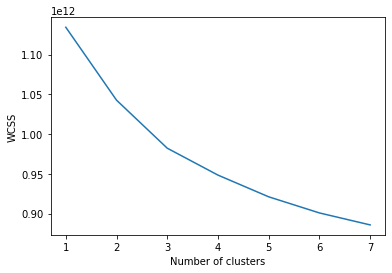

In [28]:
dataset = pd.read_csv(r'C:\Users\DELL\Documents\SHAUNAK\TY\CV\Cv_CP\Dataset_Final.csv')
x=dataset.iloc[:, 0:32].values
from sklearn.cluster import KMeans #increase range 1-20
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Kmeans

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [26]:
import pickle

In [27]:
# save the model to disk
filename = 'Kmeans_CL_5_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [28]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([1040357, 1057346, 1085538, 1024993, 1159603], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [29]:
#performing kmeans prediction of the entire vehicle dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create()
    
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final2.csv', mode='a',header=False,index=False)

In [30]:
#performing kmeans prediction of the entire pedestrian dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder12):
    #path
    path=os.path.join(folder12,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create()
    
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final12.csv', mode='a',header=False,index=False)

In [31]:
#performing kmeans prediction of the entire empty roads dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(280,430)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",filename," : ", out.shape)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final3.csv', mode='a',header=False,index=False)

descriptor shape  image     (1).jpg  :  (454, 32)
descriptor shape  image     (10).jpg  :  (384, 32)
descriptor shape  image     (100).jpg  :  (439, 32)
descriptor shape  image     (1000).jpg  :  (491, 32)
descriptor shape  image     (1001).jpg  :  (488, 32)
descriptor shape  image     (1002).jpg  :  (123, 32)
descriptor shape  image     (1003).jpg  :  (497, 32)
descriptor shape  image     (1004).jpg  :  (470, 32)
descriptor shape  image     (1005).jpg  :  (266, 32)
descriptor shape  image     (1006).jpg  :  (187, 32)
descriptor shape  image     (1007).jpg  :  (421, 32)
descriptor shape  image     (1008).jpg  :  (483, 32)
descriptor shape  image     (1009).jpg  :  (470, 32)
descriptor shape  image     (101).jpg  :  (325, 32)
descriptor shape  image     (1010).jpg  :  (111, 32)
descriptor shape  image     (1011).jpg  :  (113, 32)
descriptor shape  image     (1012).jpg  :  (69, 32)
descriptor shape  image     (1013).jpg  :  (491, 32)
descriptor shape  image     (1014).jpg  :  (472, 32)
d

descriptor shape  image     (1147).jpg  :  (471, 32)
descriptor shape  image     (1148).jpg  :  (267, 32)
descriptor shape  image     (1149).jpg  :  (247, 32)
descriptor shape  image     (115).jpg  :  (284, 32)
descriptor shape  image     (1150).jpg  :  (404, 32)
descriptor shape  image     (1151).jpg  :  (335, 32)
descriptor shape  image     (1152).jpg  :  (500, 32)
descriptor shape  image     (1153).jpg  :  (491, 32)
descriptor shape  image     (1154).jpg  :  (105, 32)
descriptor shape  image     (1155).jpg  :  (275, 32)
descriptor shape  image     (1156).jpg  :  (484, 32)
descriptor shape  image     (1157).jpg  :  (144, 32)
descriptor shape  image     (1158).jpg  :  (139, 32)
descriptor shape  image     (1159).jpg  :  (471, 32)
descriptor shape  image     (116).jpg  :  (88, 32)
descriptor shape  image     (1160).jpg  :  (215, 32)
descriptor shape  image     (1161).jpg  :  (474, 32)
descriptor shape  image     (1162).jpg  :  (500, 32)
descriptor shape  image     (1163).jpg  :  (127, 

descriptor shape  image     (1296).jpg  :  (457, 32)
descriptor shape  image     (1297).jpg  :  (131, 32)
descriptor shape  image     (1298).jpg  :  (185, 32)
descriptor shape  image     (1299).jpg  :  (364, 32)
descriptor shape  image     (13).jpg  :  (493, 32)
descriptor shape  image     (130).jpg  :  (462, 32)
descriptor shape  image     (1300).jpg  :  (97, 32)
descriptor shape  image     (1301).jpg  :  (152, 32)
descriptor shape  image     (1302).jpg  :  (492, 32)
descriptor shape  image     (1303).jpg  :  (487, 32)
descriptor shape  image     (1304).jpg  :  (498, 32)
descriptor shape  image     (1305).jpg  :  (197, 32)
descriptor shape  image     (1306).jpg  :  (200, 32)
descriptor shape  image     (1307).jpg  :  (483, 32)
descriptor shape  image     (1308).jpg  :  (475, 32)
descriptor shape  image     (1309).jpg  :  (236, 32)
descriptor shape  image     (131).jpg  :  (437, 32)
descriptor shape  image     (1310).jpg  :  (368, 32)
descriptor shape  image     (1311).jpg  :  (453, 32

descriptor shape  image     (1442).jpg  :  (488, 32)
descriptor shape  image     (1443).jpg  :  (140, 32)
descriptor shape  image     (1444).jpg  :  (231, 32)
descriptor shape  image     (1445).jpg  :  (454, 32)
descriptor shape  image     (1446).jpg  :  (444, 32)
descriptor shape  image     (1447).jpg  :  (464, 32)
descriptor shape  image     (1448).jpg  :  (195, 32)
descriptor shape  image     (1449).jpg  :  (27, 32)
descriptor shape  image     (145).jpg  :  (399, 32)
descriptor shape  image     (1450).jpg  :  (266, 32)
descriptor shape  image     (1451).jpg  :  (246, 32)
descriptor shape  image     (1452).jpg  :  (465, 32)
descriptor shape  image     (1453).jpg  :  (217, 32)
descriptor shape  image     (1454).jpg  :  (284, 32)
descriptor shape  image     (1455).jpg  :  (484, 32)
descriptor shape  image     (1456).jpg  :  (481, 32)
descriptor shape  image     (1457).jpg  :  (485, 32)
descriptor shape  image     (1458).jpg  :  (111, 32)
descriptor shape  image     (1459).jpg  :  (487,

descriptor shape  image     (1592).jpg  :  (487, 32)
descriptor shape  image     (1593).jpg  :  (428, 32)
descriptor shape  image     (1594).jpg  :  (471, 32)
descriptor shape  image     (1595).jpg  :  (260, 32)
descriptor shape  image     (1596).jpg  :  (314, 32)
descriptor shape  image     (1597).jpg  :  (194, 32)
descriptor shape  image     (1598).jpg  :  (490, 32)
descriptor shape  image     (1599).jpg  :  (202, 32)
descriptor shape  image     (16).jpg  :  (118, 32)
descriptor shape  image     (160).jpg  :  (406, 32)
descriptor shape  image     (1600).jpg  :  (464, 32)
descriptor shape  image     (1601).jpg  :  (147, 32)
descriptor shape  image     (1602).jpg  :  (489, 32)
descriptor shape  image     (1603).jpg  :  (484, 32)
descriptor shape  image     (1604).jpg  :  (169, 32)
descriptor shape  image     (1605).jpg  :  (180, 32)
descriptor shape  image     (1606).jpg  :  (68, 32)
descriptor shape  image     (1607).jpg  :  (478, 32)
descriptor shape  image     (1608).jpg  :  (344, 3

descriptor shape  image     (1735).jpg  :  (170, 32)
descriptor shape  image     (1736).jpg  :  (462, 32)
descriptor shape  image     (1737).jpg  :  (38, 32)
descriptor shape  image     (1738).jpg  :  (474, 32)
descriptor shape  image     (1739).jpg  :  (228, 32)
descriptor shape  image     (174).jpg  :  (154, 32)
descriptor shape  image     (1740).jpg  :  (487, 32)
descriptor shape  image     (1741).jpg  :  (138, 32)
descriptor shape  image     (1742).jpg  :  (235, 32)
descriptor shape  image     (1743).jpg  :  (274, 32)
descriptor shape  image     (1744).jpg  :  (452, 32)
descriptor shape  image     (1745).jpg  :  (84, 32)
descriptor shape  image     (1746).jpg  :  (267, 32)
descriptor shape  image     (1747).jpg  :  (53, 32)
descriptor shape  image     (1748).jpg  :  (402, 32)
descriptor shape  image     (1749).jpg  :  (426, 32)
descriptor shape  image     (175).jpg  :  (452, 32)
descriptor shape  image     (1750).jpg  :  (452, 32)
descriptor shape  image     (1751).jpg  :  (150, 32

descriptor shape  image     (1880).jpg  :  (337, 32)
descriptor shape  image     (1881).jpg  :  (484, 32)
descriptor shape  image     (1882).jpg  :  (498, 32)
descriptor shape  image     (1883).jpg  :  (247, 32)
descriptor shape  image     (1884).jpg  :  (488, 32)
descriptor shape  image     (1885).jpg  :  (482, 32)
descriptor shape  image     (1886).jpg  :  (462, 32)
descriptor shape  image     (1887).jpg  :  (194, 32)
descriptor shape  image     (1888).jpg  :  (147, 32)
descriptor shape  image     (1889).jpg  :  (196, 32)
descriptor shape  image     (189).jpg  :  (448, 32)
descriptor shape  image     (1890).jpg  :  (165, 32)
descriptor shape  image     (1891).jpg  :  (90, 32)
descriptor shape  image     (1892).jpg  :  (51, 32)
descriptor shape  image     (1893).jpg  :  (248, 32)
descriptor shape  image     (1894).jpg  :  (492, 32)
descriptor shape  image     (1895).jpg  :  (138, 32)
descriptor shape  image     (1896).jpg  :  (119, 32)
descriptor shape  image     (1897).jpg  :  (231, 

descriptor shape  image     (2025).jpg  :  (299, 32)
descriptor shape  image     (2026).jpg  :  (486, 32)
descriptor shape  image     (2027).jpg  :  (487, 32)
descriptor shape  image     (2028).jpg  :  (462, 32)
descriptor shape  image     (2029).jpg  :  (345, 32)
descriptor shape  image     (203).jpg  :  (211, 32)
descriptor shape  image     (2030).jpg  :  (489, 32)
descriptor shape  image     (2031).jpg  :  (325, 32)
descriptor shape  image     (2032).jpg  :  (142, 32)
descriptor shape  image     (2033).jpg  :  (497, 32)
descriptor shape  image     (2034).jpg  :  (259, 32)
descriptor shape  image     (2035).jpg  :  (485, 32)
descriptor shape  image     (2036).jpg  :  (278, 32)
descriptor shape  image     (2037).jpg  :  (71, 32)
descriptor shape  image     (2038).jpg  :  (491, 32)
descriptor shape  image     (2039).jpg  :  (87, 32)
descriptor shape  image     (204).jpg  :  (180, 32)
descriptor shape  image     (2040).jpg  :  (255, 32)
descriptor shape  image     (2041).jpg  :  (483, 3

descriptor shape  image     (2170).jpg  :  (418, 32)
descriptor shape  image     (2171).jpg  :  (330, 32)
descriptor shape  image     (2172).jpg  :  (500, 32)
descriptor shape  image     (2173).jpg  :  (462, 32)
descriptor shape  image     (2174).jpg  :  (487, 32)
descriptor shape  image     (2175).jpg  :  (230, 32)
descriptor shape  image     (2176).jpg  :  (452, 32)
descriptor shape  image     (2177).jpg  :  (201, 32)
descriptor shape  image     (2178).jpg  :  (462, 32)
descriptor shape  image     (2179).jpg  :  (465, 32)
descriptor shape  image     (218).jpg  :  (439, 32)
descriptor shape  image     (2180).jpg  :  (495, 32)
descriptor shape  image     (2181).jpg  :  (48, 32)
descriptor shape  image     (2182).jpg  :  (251, 32)
descriptor shape  image     (2183).jpg  :  (417, 32)
descriptor shape  image     (2184).jpg  :  (464, 32)
descriptor shape  image     (2185).jpg  :  (495, 32)
descriptor shape  image     (2186).jpg  :  (460, 32)
descriptor shape  image     (2187).jpg  :  (141,

descriptor shape  image     (2310).jpg  :  (487, 32)
descriptor shape  image     (2311).jpg  :  (428, 32)
descriptor shape  image     (2312).jpg  :  (250, 32)
descriptor shape  image     (2313).jpg  :  (485, 32)
descriptor shape  image     (2314).jpg  :  (199, 32)
descriptor shape  image     (2315).jpg  :  (487, 32)
descriptor shape  image     (2316).jpg  :  (483, 32)
descriptor shape  image     (2317).jpg  :  (4, 32)
descriptor shape  image     (2318).jpg  :  (470, 32)
descriptor shape  image     (2319).jpg  :  (264, 32)
descriptor shape  image     (232).jpg  :  (426, 32)
descriptor shape  image     (2320).jpg  :  (469, 32)
descriptor shape  image     (2321).jpg  :  (495, 32)
descriptor shape  image     (2322).jpg  :  (45, 32)
descriptor shape  image     (2323).jpg  :  (471, 32)
descriptor shape  image     (2324).jpg  :  (461, 32)
descriptor shape  image     (2325).jpg  :  (227, 32)
descriptor shape  image     (2326).jpg  :  (426, 32)
descriptor shape  image     (2327).jpg  :  (211, 3

descriptor shape  image     (2456).jpg  :  (307, 32)
descriptor shape  image     (2457).jpg  :  (488, 32)
descriptor shape  image     (2458).jpg  :  (138, 32)
descriptor shape  image     (2459).jpg  :  (196, 32)
descriptor shape  image     (246).jpg  :  (428, 32)
descriptor shape  image     (2460).jpg  :  (186, 32)
descriptor shape  image     (2461).jpg  :  (148, 32)
descriptor shape  image     (2462).jpg  :  (161, 32)
descriptor shape  image     (2463).jpg  :  (488, 32)
descriptor shape  image     (2464).jpg  :  (34, 32)
descriptor shape  image     (2465).jpg  :  (70, 32)
descriptor shape  image     (2466).jpg  :  (126, 32)
descriptor shape  image     (2467).jpg  :  (494, 32)
descriptor shape  image     (2468).jpg  :  (500, 32)
descriptor shape  image     (2469).jpg  :  (328, 32)
descriptor shape  image     (247).jpg  :  (158, 32)
descriptor shape  image     (2470).jpg  :  (486, 32)
descriptor shape  image     (2471).jpg  :  (450, 32)
descriptor shape  image     (2472).jpg  :  (434, 3

descriptor shape  image     (2599).jpg  :  (448, 32)
descriptor shape  image     (26).jpg  :  (482, 32)
descriptor shape  image     (260).jpg  :  (483, 32)
descriptor shape  image     (2600).jpg  :  (80, 32)
descriptor shape  image     (2601).jpg  :  (462, 32)
descriptor shape  image     (2602).jpg  :  (155, 32)
descriptor shape  image     (2603).jpg  :  (445, 32)
descriptor shape  image     (2604).jpg  :  (485, 32)
descriptor shape  image     (2605).jpg  :  (485, 32)
descriptor shape  image     (2606).jpg  :  (483, 32)
descriptor shape  image     (2607).jpg  :  (471, 32)
descriptor shape  image     (2608).jpg  :  (455, 32)
descriptor shape  image     (2609).jpg  :  (498, 32)
descriptor shape  image     (261).jpg  :  (412, 32)
descriptor shape  image     (2610).jpg  :  (459, 32)
descriptor shape  image     (2611).jpg  :  (440, 32)
descriptor shape  image     (2612).jpg  :  (248, 32)
descriptor shape  image     (2613).jpg  :  (186, 32)
descriptor shape  image     (2614).jpg  :  (462, 32

descriptor shape  image     (2740).jpg  :  (474, 32)
descriptor shape  image     (2741).jpg  :  (478, 32)
descriptor shape  image     (2742).jpg  :  (469, 32)
descriptor shape  image     (2743).jpg  :  (467, 32)
descriptor shape  image     (2744).jpg  :  (470, 32)
descriptor shape  image     (2745).jpg  :  (473, 32)
descriptor shape  image     (2746).jpg  :  (472, 32)
descriptor shape  image     (2747).jpg  :  (478, 32)
descriptor shape  image     (2748).jpg  :  (195, 32)
descriptor shape  image     (2749).jpg  :  (480, 32)
descriptor shape  image     (275).jpg  :  (470, 32)
descriptor shape  image     (2750).jpg  :  (487, 32)
descriptor shape  image     (2751).jpg  :  (492, 32)
descriptor shape  image     (2752).jpg  :  (488, 32)
descriptor shape  image     (2753).jpg  :  (500, 32)
descriptor shape  image     (2754).jpg  :  (436, 32)
descriptor shape  image     (2755).jpg  :  (439, 32)
descriptor shape  image     (2756).jpg  :  (412, 32)
descriptor shape  image     (2757).jpg  :  (425

descriptor shape  image     (2890).jpg  :  (463, 32)
descriptor shape  image     (2891).jpg  :  (458, 32)
descriptor shape  image     (2892).jpg  :  (203, 32)
descriptor shape  image     (2893).jpg  :  (454, 32)
descriptor shape  image     (2894).jpg  :  (462, 32)
descriptor shape  image     (2895).jpg  :  (462, 32)
descriptor shape  image     (2896).jpg  :  (458, 32)
descriptor shape  image     (2897).jpg  :  (463, 32)
descriptor shape  image     (2898).jpg  :  (463, 32)
descriptor shape  image     (2899).jpg  :  (462, 32)
descriptor shape  image     (29).jpg  :  (240, 32)
descriptor shape  image     (290).jpg  :  (362, 32)
descriptor shape  image     (2900).jpg  :  (454, 32)
descriptor shape  image     (2901).jpg  :  (453, 32)
descriptor shape  image     (2902).jpg  :  (453, 32)
descriptor shape  image     (2903).jpg  :  (435, 32)
descriptor shape  image     (2904).jpg  :  (448, 32)
descriptor shape  image     (2905).jpg  :  (451, 32)
descriptor shape  image     (2906).jpg  :  (444, 

descriptor shape  image     (3036).jpg  :  (302, 32)
descriptor shape  image     (3037).jpg  :  (191, 32)
descriptor shape  image     (3038).jpg  :  (467, 32)
descriptor shape  image     (3039).jpg  :  (464, 32)
descriptor shape  image     (304).jpg  :  (456, 32)
descriptor shape  image     (3040).jpg  :  (459, 32)
descriptor shape  image     (3041).jpg  :  (464, 32)
descriptor shape  image     (3042).jpg  :  (450, 32)
descriptor shape  image     (3043).jpg  :  (453, 32)
descriptor shape  image     (3044).jpg  :  (454, 32)
descriptor shape  image     (3045).jpg  :  (456, 32)
descriptor shape  image     (3046).jpg  :  (446, 32)
descriptor shape  image     (3047).jpg  :  (450, 32)
descriptor shape  image     (3048).jpg  :  (106, 32)
descriptor shape  image     (3049).jpg  :  (453, 32)
descriptor shape  image     (305).jpg  :  (437, 32)
descriptor shape  image     (3050).jpg  :  (453, 32)
descriptor shape  image     (3051).jpg  :  (449, 32)
descriptor shape  image     (3052).jpg  :  (459,

descriptor shape  image     (3177).jpg  :  (458, 32)
descriptor shape  image     (3178).jpg  :  (469, 32)
descriptor shape  image     (3179).jpg  :  (472, 32)
descriptor shape  image     (318).jpg  :  (179, 32)
descriptor shape  image     (3180).jpg  :  (467, 32)
descriptor shape  image     (3181).jpg  :  (466, 32)
descriptor shape  image     (3182).jpg  :  (468, 32)
descriptor shape  image     (3183).jpg  :  (473, 32)
descriptor shape  image     (3184).jpg  :  (475, 32)
descriptor shape  image     (3185).jpg  :  (470, 32)
descriptor shape  image     (3186).jpg  :  (458, 32)
descriptor shape  image     (3187).jpg  :  (458, 32)
descriptor shape  image     (3188).jpg  :  (463, 32)
descriptor shape  image     (3189).jpg  :  (451, 32)
descriptor shape  image     (319).jpg  :  (470, 32)
descriptor shape  image     (3190).jpg  :  (465, 32)
descriptor shape  image     (3191).jpg  :  (461, 32)
descriptor shape  image     (3192).jpg  :  (242, 32)
descriptor shape  image     (3193).jpg  :  (473,

descriptor shape  image     (3323).jpg  :  (437, 32)
descriptor shape  image     (3324).jpg  :  (442, 32)
descriptor shape  image     (3325).jpg  :  (462, 32)
descriptor shape  image     (3326).jpg  :  (462, 32)
descriptor shape  image     (3327).jpg  :  (87, 32)
descriptor shape  image     (3328).jpg  :  (435, 32)
descriptor shape  image     (3329).jpg  :  (434, 32)
descriptor shape  image     (333).jpg  :  (458, 32)
descriptor shape  image     (3330).jpg  :  (431, 32)
descriptor shape  image     (3331).jpg  :  (436, 32)
descriptor shape  image     (3332).jpg  :  (427, 32)
descriptor shape  image     (3333).jpg  :  (168, 32)
descriptor shape  image     (3334).jpg  :  (432, 32)
descriptor shape  image     (3335).jpg  :  (437, 32)
descriptor shape  image     (3336).jpg  :  (443, 32)
descriptor shape  image     (3337).jpg  :  (450, 32)
descriptor shape  image     (3338).jpg  :  (455, 32)
descriptor shape  image     (3339).jpg  :  (495, 32)
descriptor shape  image     (334).jpg  :  (31, 3

descriptor shape  image     (3471).jpg  :  (418, 32)
descriptor shape  image     (3472).jpg  :  (444, 32)
descriptor shape  image     (3473).jpg  :  (442, 32)
descriptor shape  image     (3474).jpg  :  (411, 32)
descriptor shape  image     (3475).jpg  :  (500, 32)
descriptor shape  image     (3476).jpg  :  (137, 32)
descriptor shape  image     (3477).jpg  :  (431, 32)
descriptor shape  image     (3478).jpg  :  (479, 32)
descriptor shape  image     (3479).jpg  :  (448, 32)
descriptor shape  image     (348).jpg  :  (340, 32)
descriptor shape  image     (3480).jpg  :  (424, 32)
descriptor shape  image     (3481).jpg  :  (463, 32)
descriptor shape  image     (3482).jpg  :  (434, 32)
descriptor shape  image     (3483).jpg  :  (419, 32)
descriptor shape  image     (3484).jpg  :  (419, 32)
descriptor shape  image     (3485).jpg  :  (403, 32)
descriptor shape  image     (3486).jpg  :  (426, 32)
descriptor shape  image     (3487).jpg  :  (419, 32)
descriptor shape  image     (3488).jpg  :  (426

descriptor shape  image     (3612).jpg  :  (456, 32)
descriptor shape  image     (3613).jpg  :  (442, 32)
descriptor shape  image     (3614).jpg  :  (449, 32)
descriptor shape  image     (3615).jpg  :  (452, 32)
descriptor shape  image     (3616).jpg  :  (446, 32)
descriptor shape  image     (3617).jpg  :  (463, 32)
descriptor shape  image     (3618).jpg  :  (407, 32)
descriptor shape  image     (3619).jpg  :  (456, 32)
descriptor shape  image     (362).jpg  :  (192, 32)
descriptor shape  image     (3620).jpg  :  (461, 32)
descriptor shape  image     (3621).jpg  :  (445, 32)
descriptor shape  image     (3622).jpg  :  (458, 32)
descriptor shape  image     (3623).jpg  :  (469, 32)
descriptor shape  image     (3624).jpg  :  (471, 32)
descriptor shape  image     (3625).jpg  :  (460, 32)
descriptor shape  image     (3626).jpg  :  (458, 32)
descriptor shape  image     (3627).jpg  :  (455, 32)
descriptor shape  image     (3628).jpg  :  (451, 32)
descriptor shape  image     (3629).jpg  :  (463

descriptor shape  image     (3759).jpg  :  (463, 32)
descriptor shape  image     (376).jpg  :  (289, 32)
descriptor shape  image     (3760).jpg  :  (457, 32)
descriptor shape  image     (3761).jpg  :  (453, 32)
descriptor shape  image     (3762).jpg  :  (124, 32)
descriptor shape  image     (3763).jpg  :  (462, 32)
descriptor shape  image     (3764).jpg  :  (455, 32)
descriptor shape  image     (3765).jpg  :  (451, 32)
descriptor shape  image     (3766).jpg  :  (439, 32)
descriptor shape  image     (3767).jpg  :  (446, 32)
descriptor shape  image     (3768).jpg  :  (463, 32)
descriptor shape  image     (3769).jpg  :  (448, 32)
descriptor shape  image     (377).jpg  :  (338, 32)
descriptor shape  image     (3770).jpg  :  (443, 32)
descriptor shape  image     (3771).jpg  :  (451, 32)
descriptor shape  image     (3772).jpg  :  (440, 32)
descriptor shape  image     (3773).jpg  :  (279, 32)
descriptor shape  image     (3774).jpg  :  (457, 32)
descriptor shape  image     (3775).jpg  :  (443,

descriptor shape  image     (3906).jpg  :  (135, 32)
descriptor shape  image     (3907).jpg  :  (429, 32)
descriptor shape  image     (3908).jpg  :  (435, 32)
descriptor shape  image     (3909).jpg  :  (402, 32)
descriptor shape  image     (391).jpg  :  (461, 32)
descriptor shape  image     (3910).jpg  :  (413, 32)
descriptor shape  image     (3911).jpg  :  (401, 32)
descriptor shape  image     (3912).jpg  :  (419, 32)
descriptor shape  image     (3913).jpg  :  (414, 32)
descriptor shape  image     (3914).jpg  :  (415, 32)
descriptor shape  image     (3915).jpg  :  (398, 32)
descriptor shape  image     (3916).jpg  :  (403, 32)
descriptor shape  image     (3917).jpg  :  (244, 32)
descriptor shape  image     (3918).jpg  :  (426, 32)
descriptor shape  image     (3919).jpg  :  (404, 32)
descriptor shape  image     (392).jpg  :  (452, 32)
descriptor shape  image     (3920).jpg  :  (388, 32)
descriptor shape  image     (3921).jpg  :  (409, 32)
descriptor shape  image     (3922).jpg  :  (384,

descriptor shape  image     (405).jpg  :  (65, 32)
descriptor shape  image     (4050).jpg  :  (467, 32)
descriptor shape  image     (4051).jpg  :  (452, 32)
descriptor shape  image     (4052).jpg  :  (460, 32)
descriptor shape  image     (4053).jpg  :  (464, 32)
descriptor shape  image     (4054).jpg  :  (462, 32)
descriptor shape  image     (4055).jpg  :  (469, 32)
descriptor shape  image     (4056).jpg  :  (467, 32)
descriptor shape  image     (4057).jpg  :  (461, 32)
descriptor shape  image     (4058).jpg  :  (468, 32)
descriptor shape  image     (4059).jpg  :  (460, 32)
descriptor shape  image     (406).jpg  :  (273, 32)
descriptor shape  image     (4060).jpg  :  (479, 32)
descriptor shape  image     (4061).jpg  :  (469, 32)
descriptor shape  image     (4062).jpg  :  (479, 32)
descriptor shape  image     (4063).jpg  :  (471, 32)
descriptor shape  image     (4064).jpg  :  (469, 32)
descriptor shape  image     (4065).jpg  :  (471, 32)
descriptor shape  image     (4066).jpg  :  (472, 

descriptor shape  image     (420).jpg  :  (231, 32)
descriptor shape  image     (4200).jpg  :  (432, 32)
descriptor shape  image     (4201).jpg  :  (483, 32)
descriptor shape  image     (4202).jpg  :  (421, 32)
descriptor shape  image     (4203).jpg  :  (388, 32)
descriptor shape  image     (4204).jpg  :  (375, 32)
descriptor shape  image     (4205).jpg  :  (381, 32)
descriptor shape  image     (4206).jpg  :  (365, 32)
descriptor shape  image     (4207).jpg  :  (356, 32)
descriptor shape  image     (4208).jpg  :  (375, 32)
descriptor shape  image     (4209).jpg  :  (356, 32)
descriptor shape  image     (421).jpg  :  (482, 32)
descriptor shape  image     (4210).jpg  :  (368, 32)
descriptor shape  image     (4211).jpg  :  (354, 32)
descriptor shape  image     (4212).jpg  :  (332, 32)
descriptor shape  image     (4213).jpg  :  (365, 32)
descriptor shape  image     (4214).jpg  :  (79, 32)
descriptor shape  image     (4215).jpg  :  (378, 32)
descriptor shape  image     (4216).jpg  :  (371, 

descriptor shape  image     (4346).jpg  :  (420, 32)
descriptor shape  image     (4347).jpg  :  (399, 32)
descriptor shape  image     (4348).jpg  :  (398, 32)
descriptor shape  image     (4349).jpg  :  (395, 32)
descriptor shape  image     (435).jpg  :  (337, 32)
descriptor shape  image     (4350).jpg  :  (399, 32)
descriptor shape  image     (4351).jpg  :  (402, 32)
descriptor shape  image     (4352).jpg  :  (382, 32)
descriptor shape  image     (4353).jpg  :  (393, 32)
descriptor shape  image     (4354).jpg  :  (393, 32)
descriptor shape  image     (4355).jpg  :  (431, 32)
descriptor shape  image     (4356).jpg  :  (484, 32)
descriptor shape  image     (4357).jpg  :  (387, 32)
descriptor shape  image     (4358).jpg  :  (394, 32)
descriptor shape  image     (4359).jpg  :  (385, 32)
descriptor shape  image     (436).jpg  :  (426, 32)
descriptor shape  image     (4360).jpg  :  (366, 32)
descriptor shape  image     (4361).jpg  :  (349, 32)
descriptor shape  image     (4362).jpg  :  (397,

descriptor shape  image     (4492).jpg  :  (456, 32)
descriptor shape  image     (4493).jpg  :  (473, 32)
descriptor shape  image     (4494).jpg  :  (479, 32)
descriptor shape  image     (4495).jpg  :  (482, 32)
descriptor shape  image     (4496).jpg  :  (484, 32)
descriptor shape  image     (4497).jpg  :  (428, 32)
descriptor shape  image     (4498).jpg  :  (157, 32)
descriptor shape  image     (4499).jpg  :  (430, 32)
descriptor shape  image     (45).jpg  :  (424, 32)
descriptor shape  image     (450).jpg  :  (372, 32)
descriptor shape  image     (4500).jpg  :  (426, 32)
descriptor shape  image     (4501).jpg  :  (416, 32)
descriptor shape  image     (4502).jpg  :  (416, 32)
descriptor shape  image     (4503).jpg  :  (429, 32)
descriptor shape  image     (4504).jpg  :  (436, 32)
descriptor shape  image     (4505).jpg  :  (434, 32)
descriptor shape  image     (4506).jpg  :  (432, 32)
descriptor shape  image     (4507).jpg  :  (422, 32)
descriptor shape  image     (4508).jpg  :  (434, 

descriptor shape  image     (464).jpg  :  (470, 32)
descriptor shape  image     (4640).jpg  :  (484, 32)
descriptor shape  image     (4641).jpg  :  (484, 32)
descriptor shape  image     (4642).jpg  :  (463, 32)
descriptor shape  image     (4643).jpg  :  (473, 32)
descriptor shape  image     (4644).jpg  :  (474, 32)
descriptor shape  image     (4645).jpg  :  (483, 32)
descriptor shape  image     (4646).jpg  :  (487, 32)
descriptor shape  image     (4647).jpg  :  (487, 32)
descriptor shape  image     (4648).jpg  :  (470, 32)
descriptor shape  image     (4649).jpg  :  (470, 32)
descriptor shape  image     (465).jpg  :  (411, 32)
descriptor shape  image     (4650).jpg  :  (475, 32)
descriptor shape  image     (4651).jpg  :  (461, 32)
descriptor shape  image     (4652).jpg  :  (463, 32)
descriptor shape  image     (4653).jpg  :  (461, 32)
descriptor shape  image     (4654).jpg  :  (466, 32)
descriptor shape  image     (4655).jpg  :  (463, 32)
descriptor shape  image     (4656).jpg  :  (466,

descriptor shape  image     (4790).jpg  :  (290, 32)
descriptor shape  image     (4791).jpg  :  (148, 32)
descriptor shape  image     (4792).jpg  :  (326, 32)
descriptor shape  image     (4793).jpg  :  (457, 32)
descriptor shape  image     (4794).jpg  :  (479, 32)
descriptor shape  image     (4795).jpg  :  (311, 32)
descriptor shape  image     (4796).jpg  :  (469, 32)
descriptor shape  image     (4797).jpg  :  (466, 32)
descriptor shape  image     (4798).jpg  :  (393, 32)
descriptor shape  image     (4799).jpg  :  (490, 32)
descriptor shape  image     (48).jpg  :  (450, 32)
descriptor shape  image     (480).jpg  :  (464, 32)
descriptor shape  image     (4800).jpg  :  (488, 32)
descriptor shape  image     (4801).jpg  :  (490, 32)
descriptor shape  image     (4802).jpg  :  (492, 32)
descriptor shape  image     (4803).jpg  :  (500, 32)
descriptor shape  image     (4804).jpg  :  (487, 32)
descriptor shape  image     (4805).jpg  :  (482, 32)
descriptor shape  image     (4806).jpg  :  (425, 

descriptor shape  image     (4938).jpg  :  (463, 32)
descriptor shape  image     (4939).jpg  :  (430, 32)
descriptor shape  image     (494).jpg  :  (351, 32)
descriptor shape  image     (4940).jpg  :  (443, 32)
descriptor shape  image     (4941).jpg  :  (458, 32)
descriptor shape  image     (4942).jpg  :  (473, 32)
descriptor shape  image     (4943).jpg  :  (468, 32)
descriptor shape  image     (4944).jpg  :  (474, 32)
descriptor shape  image     (4945).jpg  :  (456, 32)
descriptor shape  image     (4946).jpg  :  (466, 32)
descriptor shape  image     (4947).jpg  :  (462, 32)
descriptor shape  image     (4948).jpg  :  (465, 32)
descriptor shape  image     (4949).jpg  :  (47, 32)
descriptor shape  image     (495).jpg  :  (110, 32)
descriptor shape  image     (4950).jpg  :  (448, 32)
descriptor shape  image     (4951).jpg  :  (466, 32)
descriptor shape  image     (4952).jpg  :  (473, 32)
descriptor shape  image     (4953).jpg  :  (464, 32)
descriptor shape  image     (4954).jpg  :  (451, 

descriptor shape  image     (5081).jpg  :  (158, 32)
descriptor shape  image     (5082).jpg  :  (238, 32)
descriptor shape  image     (5083).jpg  :  (130, 32)
descriptor shape  image     (5084).jpg  :  (210, 32)
descriptor shape  image     (5085).jpg  :  (88, 32)
descriptor shape  image     (5086).jpg  :  (401, 32)
descriptor shape  image     (5087).jpg  :  (79, 32)
descriptor shape  image     (5088).jpg  :  (434, 32)
descriptor shape  image     (5089).jpg  :  (438, 32)
descriptor shape  image     (509).jpg  :  (397, 32)
descriptor shape  image     (5090).jpg  :  (19, 32)
descriptor shape  image     (5091).jpg  :  (492, 32)
descriptor shape  image     (5092).jpg  :  (482, 32)
descriptor shape  image     (5093).jpg  :  (196, 32)
descriptor shape  image     (5094).jpg  :  (369, 32)
descriptor shape  image     (5095).jpg  :  (36, 32)
descriptor shape  image     (5096).jpg  :  (322, 32)
descriptor shape  image     (5097).jpg  :  (292, 32)
descriptor shape  image     (5098).jpg  :  (480, 32

descriptor shape  image     (5228).jpg  :  (244, 32)
descriptor shape  image     (5229).jpg  :  (457, 32)
descriptor shape  image     (523).jpg  :  (175, 32)
descriptor shape  image     (5230).jpg  :  (358, 32)
descriptor shape  image     (5231).jpg  :  (142, 32)
descriptor shape  image     (5232).jpg  :  (482, 32)
descriptor shape  image     (5233).jpg  :  (465, 32)
descriptor shape  image     (5234).jpg  :  (209, 32)
descriptor shape  image     (5235).jpg  :  (173, 32)
descriptor shape  image     (5236).jpg  :  (266, 32)
descriptor shape  image     (5237).jpg  :  (420, 32)
descriptor shape  image     (5238).jpg  :  (430, 32)
descriptor shape  image     (5239).jpg  :  (430, 32)
descriptor shape  image     (524).jpg  :  (450, 32)
descriptor shape  image     (5240).jpg  :  (235, 32)
descriptor shape  image     (5241).jpg  :  (39, 32)
descriptor shape  image     (5242).jpg  :  (392, 32)
descriptor shape  image     (5243).jpg  :  (477, 32)
descriptor shape  image     (5244).jpg  :  (488, 

descriptor shape  image     (5371).jpg  :  (472, 32)
descriptor shape  image     (5373).jpg  :  (479, 32)
descriptor shape  image     (5374).jpg  :  (206, 32)
descriptor shape  image     (5375).jpg  :  (484, 32)
descriptor shape  image     (5376).jpg  :  (286, 32)
descriptor shape  image     (5377).jpg  :  (484, 32)
descriptor shape  image     (5378).jpg  :  (417, 32)
descriptor shape  image     (5379).jpg  :  (361, 32)
descriptor shape  image     (538).jpg  :  (363, 32)
descriptor shape  image     (5380).jpg  :  (428, 32)
descriptor shape  image     (5381).jpg  :  (407, 32)
descriptor shape  image     (5382).jpg  :  (331, 32)
descriptor shape  image     (5383).jpg  :  (479, 32)
descriptor shape  image     (5384).jpg  :  (443, 32)
descriptor shape  image     (5385).jpg  :  (300, 32)
descriptor shape  image     (5386).jpg  :  (34, 32)
descriptor shape  image     (5387).jpg  :  (473, 32)
descriptor shape  image     (5388).jpg  :  (272, 32)
descriptor shape  image     (5389).jpg  :  (483,

descriptor shape  image     (5514).jpg  :  (359, 32)
descriptor shape  image     (5515).jpg  :  (419, 32)
descriptor shape  image     (5516).jpg  :  (267, 32)
descriptor shape  image     (5517).jpg  :  (415, 32)
descriptor shape  image     (5518).jpg  :  (492, 32)
descriptor shape  image     (5519).jpg  :  (76, 32)
descriptor shape  image     (552).jpg  :  (400, 32)
descriptor shape  image     (5520).jpg  :  (398, 32)
descriptor shape  image     (5521).jpg  :  (459, 32)
descriptor shape  image     (5522).jpg  :  (483, 32)
descriptor shape  image     (5523).jpg  :  (327, 32)
descriptor shape  image     (5524).jpg  :  (442, 32)
descriptor shape  image     (5525).jpg  :  (474, 32)
descriptor shape  image     (5526).jpg  :  (176, 32)
descriptor shape  image     (5527).jpg  :  (452, 32)
descriptor shape  image     (5528).jpg  :  (379, 32)
descriptor shape  image     (5529).jpg  :  (403, 32)
descriptor shape  image     (553).jpg  :  (128, 32)
descriptor shape  image     (5530).jpg  :  (482, 

descriptor shape  image     (5659).jpg  :  (170, 32)
descriptor shape  image     (566).jpg  :  (61, 32)
descriptor shape  image     (5660).jpg  :  (249, 32)
descriptor shape  image     (5661).jpg  :  (62, 32)
descriptor shape  image     (5662).jpg  :  (136, 32)
descriptor shape  image     (5663).jpg  :  (232, 32)
descriptor shape  image     (5664).jpg  :  (389, 32)
descriptor shape  image     (5665).jpg  :  (353, 32)
descriptor shape  image     (5666).jpg  :  (400, 32)
descriptor shape  image     (5667).jpg  :  (461, 32)
descriptor shape  image     (5668).jpg  :  (258, 32)
descriptor shape  image     (5669).jpg  :  (4, 32)
descriptor shape  image     (567).jpg  :  (484, 32)
descriptor shape  image     (5670).jpg  :  (143, 32)
descriptor shape  image     (5671).jpg  :  (21, 32)
descriptor shape  image     (5672).jpg  :  (476, 32)
descriptor shape  image     (5673).jpg  :  (484, 32)
descriptor shape  image     (5674).jpg  :  (461, 32)
descriptor shape  image     (5675).jpg  :  (418, 32)


descriptor shape  image     (5800).jpg  :  (355, 32)
descriptor shape  image     (5801).jpg  :  (487, 32)
descriptor shape  image     (5802).jpg  :  (417, 32)
descriptor shape  image     (5803).jpg  :  (327, 32)
descriptor shape  image     (5804).jpg  :  (29, 32)
descriptor shape  image     (5805).jpg  :  (163, 32)
descriptor shape  image     (5806).jpg  :  (406, 32)
descriptor shape  image     (5807).jpg  :  (468, 32)
descriptor shape  image     (5808).jpg  :  (488, 32)
descriptor shape  image     (5809).jpg  :  (479, 32)
descriptor shape  image     (581).jpg  :  (314, 32)
descriptor shape  image     (5810).jpg  :  (172, 32)
descriptor shape  image     (5811).jpg  :  (338, 32)
descriptor shape  image     (5812).jpg  :  (6, 32)
descriptor shape  image     (5813).jpg  :  (387, 32)
descriptor shape  image     (5814).jpg  :  (8, 32)
descriptor shape  image     (5815).jpg  :  (476, 32)
descriptor shape  image     (5816).jpg  :  (57, 32)
descriptor shape  image     (5817).jpg  :  (230, 32)


descriptor shape  image     (698).jpg  :  (472, 32)
descriptor shape  image     (699).jpg  :  (483, 32)
descriptor shape  image     (7).jpg  :  (459, 32)
descriptor shape  image     (70).jpg  :  (184, 32)
descriptor shape  image     (700).jpg  :  (485, 32)
descriptor shape  image     (701).jpg  :  (499, 32)
descriptor shape  image     (702).jpg  :  (159, 32)
descriptor shape  image     (703).jpg  :  (495, 32)
descriptor shape  image     (704).jpg  :  (159, 32)
descriptor shape  image     (705).jpg  :  (445, 32)
descriptor shape  image     (706).jpg  :  (247, 32)
descriptor shape  image     (707).jpg  :  (470, 32)
descriptor shape  image     (708).jpg  :  (480, 32)
descriptor shape  image     (709).jpg  :  (118, 32)
descriptor shape  image     (71).jpg  :  (230, 32)
descriptor shape  image     (710).jpg  :  (187, 32)
descriptor shape  image     (711).jpg  :  (374, 32)
descriptor shape  image     (712).jpg  :  (485, 32)
descriptor shape  image     (713).jpg  :  (495, 32)
descriptor shape

descriptor shape  image     (842).jpg  :  (439, 32)
descriptor shape  image     (843).jpg  :  (461, 32)
descriptor shape  image     (844).jpg  :  (473, 32)
descriptor shape  image     (845).jpg  :  (499, 32)
descriptor shape  image     (846).jpg  :  (115, 32)
descriptor shape  image     (847).jpg  :  (458, 32)
descriptor shape  image     (848).jpg  :  (190, 32)
descriptor shape  image     (849).jpg  :  (480, 32)
descriptor shape  image     (85).jpg  :  (302, 32)
descriptor shape  image     (850).jpg  :  (279, 32)
descriptor shape  image     (851).jpg  :  (430, 32)
descriptor shape  image     (852).jpg  :  (494, 32)
descriptor shape  image     (853).jpg  :  (487, 32)
descriptor shape  image     (854).jpg  :  (139, 32)
descriptor shape  image     (855).jpg  :  (457, 32)
descriptor shape  image     (856).jpg  :  (344, 32)
descriptor shape  image     (857).jpg  :  (326, 32)
descriptor shape  image     (858).jpg  :  (492, 32)
descriptor shape  image     (859).jpg  :  (489, 32)
descriptor sh

descriptor shape  image     (987).jpg  :  (493, 32)
descriptor shape  image     (988).jpg  :  (161, 32)
descriptor shape  image     (989).jpg  :  (109, 32)
descriptor shape  image     (99).jpg  :  (453, 32)
descriptor shape  image     (990).jpg  :  (213, 32)
descriptor shape  image     (991).jpg  :  (138, 32)
descriptor shape  image     (992).jpg  :  (219, 32)
descriptor shape  image     (993).jpg  :  (484, 32)
descriptor shape  image     (994).jpg  :  (249, 32)
descriptor shape  image     (995).jpg  :  (481, 32)
descriptor shape  image     (996).jpg  :  (115, 32)
descriptor shape  image     (997).jpg  :  (433, 32)
descriptor shape  image     (998).jpg  :  (472, 32)
descriptor shape  image     (999).jpg  :  (274, 32)


In [32]:
#Displaying the kmeans predicted data
print("Vehicles")
dat1= pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final2.csv',header=None)
print(dat1)

Vehicles
        0    1    2    3    4  5
0     126  138   54   49  116  0
1      99   87  163   50   90  0
2     147   93  139   44   63  0
3     135  109  104   46   89  0
4      96  115   48  100  130  0
...   ...  ...  ...  ...  ... ..
3127   97  116   96   86  100  0
3128  109  125   69   81  105  0
3129   85  136   93   63  120  0
3130  101  159   74   72   77  0
3131   90  131  102   74  102  0

[3132 rows x 6 columns]


In [33]:
print("Pedestrian")
dat12= pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final12.csv',header=None)
print(dat1)

Pedestrian
        0    1    2    3    4  5
0     126  138   54   49  116  0
1      99   87  163   50   90  0
2     147   93  139   44   63  0
3     135  109  104   46   89  0
4      96  115   48  100  130  0
...   ...  ...  ...  ...  ... ..
3127   97  116   96   86  100  0
3128  109  125   69   81  105  0
3129   85  136   93   63  120  0
3130  101  159   74   72   77  0
3131   90  131  102   74  102  0

[3132 rows x 6 columns]


In [34]:
print("Empty Roads")
dat2= pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_Final3.csv',header=None)
print(dat2)

Empty Roads
        0    1    2   3    4  5
0      99   86  107  76   86  1
1      98   50  116  62   58  1
2      70  118   54  91  106  1
3      91   51  135  75  139  1
4      93  124   66  91  114  1
...   ...  ...  ...  ..  ... ..
5825  159   71  136  41   74  1
5826    6   10   16  47   36  1
5827   80  137   55  71   90  1
5828   96   56  151  91   78  1
5829   33   29   40  70  102  1

[5830 rows x 6 columns]


In [35]:
#appending All classes into 1 csv file

B=dat1.append(dat12)
A=B.append(dat2)
csv_data=A.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_FinalFinal.csv', mode='a',header=False,index=False)

In [36]:
A

,0,1,2,3,4,5
0,126,138,54,49,116,0
1,99,87,163,50,90,0
2,147,93,139,44,63,0
3,135,109,104,46,89,0
4,96,115,48,100,130,0
...,...,...,...,...,...,...
5825,159,71,136,41,74,1
5826,6,10,16,47,36,1
5827,80,137,55,71,90,1
5828,96,56,151,91,78,1


In [37]:
x = A.iloc[:,0:5].values

In [38]:
x

array([[126, 138,  54,  49, 116],
       [ 99,  87, 163,  50,  90],
       [147,  93, 139,  44,  63],
       ...,
       [ 80, 137,  55,  71,  90],
       [ 96,  56, 151,  91,  78],
       [ 33,  29,  40,  70, 102]], dtype=int64)

In [39]:
y = A.iloc[:,5].values

In [40]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [42]:
Dhoni

array([[ 1.33004054,  1.35118106, -1.02680296, -0.93111201,  0.60758687],
       [ 0.4592355 ,  0.02227392,  2.22275533, -0.90413052, -0.12636278],
       [ 2.00733335,  0.17861594,  1.50725626, -1.06601946, -0.88854125],
       ...,
       [-0.15355323,  1.32512406, -0.9969905 , -0.33751923, -0.12636278],
       [ 0.36247938, -0.78549317,  1.8650058 ,  0.20211057, -0.46510877],
       [-1.66939904, -1.48903224, -1.44417742, -0.36450072,  0.21238321]])

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [45]:
Bhumi = pca.transform(Dhoni)

In [46]:
Bhumi

array([[-0.6147737 , -0.78362872,  1.58670836, -0.77724114,  1.33093423],
       [-0.89734232, -1.64314355, -1.09465414,  1.12974445, -0.0756308 ],
       [-0.9443212 , -2.58612361, -0.69208701, -0.44649806, -0.02987485],
       ...,
       [ 0.27331522, -0.11550366,  1.66681518, -0.03681025,  0.18904778],
       [-0.63505206, -0.7847138 , -1.62955798,  0.41333901, -0.79902257],
       [ 2.08521072,  1.47941155, -0.4263167 ,  0.16190513,  0.72319053]])

In [47]:
Bhumi = pd.DataFrame(Bhumi)

In [48]:
Bhumi

,0,1,2,3,4
0,-0.614774,-0.783629,1.586708,-0.777241,1.330934
1,-0.897342,-1.643144,-1.094654,1.129744,-0.075631
2,-0.944321,-2.586124,-0.692087,-0.446498,-0.029875
3,-0.789758,-1.724246,0.194177,-0.496473,0.602005
4,-0.545151,0.883682,1.177173,-0.638897,0.694201
...,...,...,...,...,...
12269,-1.019085,-2.503655,-1.177824,-0.826815,0.413305
12270,4.211000,0.944897,-0.349653,0.031441,-0.014394
12271,0.273315,-0.115504,1.666815,-0.036810,0.189048
12272,-0.635052,-0.784714,-1.629558,0.413339,-0.799023


In [49]:
Bhumi.shape

(12274, 5)

In [50]:
print(pca.explained_variance_ratio_) 

[0.36688986 0.31342211 0.17962289 0.08014803 0.05991711]


In [51]:
pca = PCA(n_components=3)
pca.fit(Dhoni)

PCA(n_components=3)

In [52]:
# save the model to disk
filename = 'PCA_3_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [53]:
Bhumi = pca.transform(Dhoni)

In [54]:
Bhumi

array([[-0.6147737 , -0.78362872,  1.58670836],
       [-0.89734232, -1.64314355, -1.09465414],
       [-0.9443212 , -2.58612361, -0.69208701],
       ...,
       [ 0.27331522, -0.11550366,  1.66681518],
       [-0.63505206, -0.7847138 , -1.62955798],
       [ 2.08521072,  1.47941155, -0.4263167 ]])

In [55]:
Bhumi.shape

(12274, 3)

In [56]:
print(pca.explained_variance_ratio_) 

[0.36688986 0.31342211 0.17962289]


In [57]:
Bhumi = pd.DataFrame(Bhumi)

In [58]:
Bhumi

,0,1,2
0,-0.614774,-0.783629,1.586708
1,-0.897342,-1.643144,-1.094654
2,-0.944321,-2.586124,-0.692087
3,-0.789758,-1.724246,0.194177
4,-0.545151,0.883682,1.177173
...,...,...,...
12269,-1.019085,-2.503655,-1.177824
12270,4.211000,0.944897,-0.349653
12271,0.273315,-0.115504,1.666815
12272,-0.635052,-0.784714,-1.629558


In [59]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)

In [60]:
B

,0,1,2,0
0,-0.614774,-0.783629,1.586708,0
1,-0.897342,-1.643144,-1.094654,0
2,-0.944321,-2.586124,-0.692087,0
3,-0.789758,-1.724246,0.194177,0
4,-0.545151,0.883682,1.177173,0
...,...,...,...,...
12269,-1.019085,-2.503655,-1.177824,1
12270,4.211000,0.944897,-0.349653,1
12271,0.273315,-0.115504,1.666815,1
12272,-0.635052,-0.784714,-1.629558,1


In [61]:
csv_data=B.to_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_FinalFinalFinal.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [62]:
data= pd.read_csv('C:/Users/DELL/Documents/SHAUNAK/TY/CV/Cv_CP/Dataset_FinalFinalFinal.csv',header=None)

data

,0,1,2,3
0,-0.614774,-0.783629,1.586708,0
1,-0.897342,-1.643144,-1.094654,0
2,-0.944321,-2.586124,-0.692087,0
3,-0.789758,-1.724246,0.194177,0
4,-0.545151,0.883682,1.177173,0
...,...,...,...,...
12269,-1.019085,-2.503655,-1.177824,1
12270,4.211000,0.944897,-0.349653,1
12271,0.273315,-0.115504,1.666815,1
12272,-0.635052,-0.784714,-1.629558,1


In [63]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:3].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,3]
print("Y values")
print(y)

X values
[[-0.6147737  -0.78362872  1.58670836]
 [-0.89734232 -1.64314355 -1.09465414]
 [-0.9443212  -2.58612361 -0.69208701]
 ...
 [ 0.27331522 -0.11550366  1.66681518]
 [-0.63505206 -0.7847138  -1.62955798]
 [ 2.08521072  1.47941155 -0.4263167 ]]
Y values
0        0
1        0
2        0
3        0
4        0
        ..
12269    1
12270    1
12271    1
12272    1
12273    1
Name: 3, Length: 12274, dtype: int64


In [64]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

# DECISION TREE

In [66]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model1 = DecisionTreeClassifier(max_depth=13)
filename = 'model1.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")

Decision Tree Results
Decision Tree Accuracy:  83.29938900203666 %


In [67]:
#Recognition &Validation
#Assigning path with any any class image
data=[]
path=r"C:\Users\DELL\Documents\SHAUNAK\TY\CV\Cv_CP\Dataset_CV_Final\Positive Dataset\Vehicles_Resized_Final\4.jpg"


#Repeated the process of image pre-processing and feature extraction
a=cv2.imread(path)
resize=(280,430)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)

#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

#initialise Kmeans and create 5 clusters


#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the hostogram for all those vlaues
hist=np.histogram(a,bins=[0,1,2,3,4,5])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data.append(hist[0])

Output = pd.DataFrame(data)
print("Histogram:\n",Output)

Descriptor Shape: (487, 32)
Histogram:
     0   1   2   3    4
0  88  89  94  94  122


In [68]:
from sklearn.preprocessing import StandardScaler
MuktaS = StandardScaler()
Mukta = MuktaS.fit_transform(Output)

In [69]:
Mukta

array([[0., 0., 0., 0., 0.]])

In [70]:
Mukta.shape

(1, 5)

In [71]:
MB = pca.transform(Mukta)

In [72]:
MB.shape

(1, 3)

In [73]:
MB

array([[-1.37194538e-17,  4.40213961e-17, -3.31767365e-17]])

In [74]:
#prediction
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


# SVM

In [77]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='rbf')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)
y_pred_LK = Dhoni_LK.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("SVM RBF")
print("Train Accuracy:",DhoniSVM_LK.score(x_train, y_train))
print("Test Accuracy:",DhoniSVM_LK.score(x_test, y_test))
print("Precision Score:",metrics.precision_score(y_test, y_pred_LK))
print("Recall Score:",metrics.recall_score(y_test, y_pred_LK))
print("F1 Score:",metrics.f1_score(y_test, y_pred_LK))

SVM RBF
Train Accuracy: 0.8486607597515022
Test Accuracy: 0.8431771894093686
Precision Score: 0.9009803921568628
Recall Score: 0.7639235245220283
F1 Score: 0.8268106162843005


In [79]:
from sklearn.svm import SVC
DhoniSVM_LK_2 = SVC(kernel='poly', degree=3)
Dhoni_LK_2 = DhoniSVM_LK_2.fit(x_train, y_train)
y_pred_LK_2 = Dhoni_LK_2.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("SVM RBF")
print("Train Accuracy:",DhoniSVM_LK_2.score(x_train, y_train))
print("Test Accuracy:",DhoniSVM_LK_2.score(x_test, y_test))
print("Precision Score:",metrics.precision_score(y_test, y_pred_LK_2))
print("Recall Score:",metrics.recall_score(y_test, y_pred_LK_2))
print("F1 Score:",metrics.f1_score(y_test, y_pred_LK_2))

SVM RBF
Train Accuracy: 0.7256339749465323
Test Accuracy: 0.7014256619144603
Precision Score: 0.9662698412698413
Recall Score: 0.40482128013300084
F1 Score: 0.5705916813122438


In [81]:
from sklearn.svm import SVC
DhoniSVM_LK_3 = SVC(kernel='linear')
Dhoni_LK_3 = DhoniSVM_LK_3.fit(x_train, y_train)
y_pred_LK_3 = Dhoni_LK_3.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("SVM RBF")
print("Train Accuracy:",DhoniSVM_LK_3.score(x_train, y_train))
print("Test Accuracy:",DhoniSVM_LK_3.score(x_test, y_test))
print("Precision Score:",metrics.precision_score(y_test, y_pred_LK_3))
print("Recall Score:",metrics.recall_score(y_test, y_pred_LK_3))
print("F1 Score:",metrics.f1_score(y_test, y_pred_LK_3))


SVM RBF
Train Accuracy: 0.8458091455341684
Test Accuracy: 0.8419551934826884
Precision Score: 0.9054726368159204
Recall Score: 0.7564422277639236
F1 Score: 0.8242753623188406


In [82]:
filename = 'SVC_RBF_PCA_3.sav'
pickle.dump(Dhoni_LK, open(filename, 'wb'))

In [83]:
Dhoni_LK

SVC()

In [84]:
y_pred_LK = Dhoni_LK.predict(x_test)

In [85]:
y_pred_LK

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test, y_pred_LK)

array([[1151,  101],
       [ 284,  919]], dtype=int64)

In [91]:
recall_sensitivity = metrics.recall_score(y_test,y_pred_LK, pos_label=1)
recall_specificity= metrics.recall_score(y_test, y_pred_LK, pos_label=0)
print("Sensitivity:",recall_sensitivity)
print("Specificity:",recall_specificity)

Sensitivity: 0.7639235245220283
Specificity: 0.9193290734824281


In [96]:
from sklearn.metrics import accuracy_score

In [93]:
print("Accuracy Score:")
accuracy_score(y_test, y_pred_LK)

Accuracy Score:


0.8431771894093686

In [94]:
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


# KNN

In [96]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train )
ypred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, ypred ))
print("Train Accuracy:",model.score(x_train, y_train))
print("Test Accuracy:",model.score(x_test, y_test))
print("Precision Score:",metrics.precision_score(y_test, ypred))
print("Recall Score:",metrics.recall_score(y_test, ypred))
print("F1 Score:",metrics.f1_score(y_test, ypred))

Accuracy: 0.8358452138492871
Train Accuracy: 0.8829819737244119
Test Accuracy: 0.8358452138492871
Precision Score: 0.8558718861209964
Recall Score: 0.799667497921862
F1 Score: 0.8268156424581005


## RANDOM FOREST

In [97]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [100]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier")
print("Train Accuracy:",clf.score(x_train, y_train))
print("Test Accuracy:",clf.score(x_test, y_test))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("Recall Score:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
recall_sensitivity = metrics.recall_score(y_test,y_pred, pos_label=1)
recall_specificity= metrics.recall_score(y_test, y_pred, pos_label=0)
print("Sensitivity:",recall_sensitivity)
print("Specificity:",recall_specificity)

##Saving model
with open('RandomForest', 'wb') as files:
    pickle.dump(clf, files)

Random Forest Classifier
Train Accuracy: 1.0
Test Accuracy: 0.8957230142566192
Precision Score: 0.90995670995671
Recall Score: 0.8736492103075644
F1 Score: 0.8914334181509754
Confusion Matrix: 
[[1148  104]
 [ 152 1051]]
Sensitivity: 0.8736492103075644
Specificity: 0.9169329073482428
